# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score, KFold, cross_validate
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


# Load Data

In [3]:
df_housing = pd.read_excel("AmesHousing.xls", encoding="latin1")
df_housing.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Plot of SalePrice vs Gr Liv Area

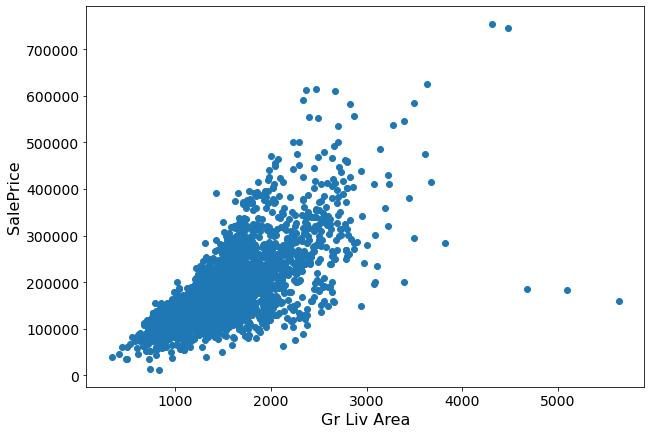

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df_housing['Gr Liv Area'],df_housing['SalePrice'])
plt.xlabel("Gr Liv Area",fontsize =16)
plt.ylabel("SalePrice", fontsize =16)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14 )
plt.show()

Drop values for Gr Liv Area greater that 4000 (Dean De Cook, 2011)

In [4]:
df_housing.drop(df_housing[df_housing['Gr Liv Area'] > 4000].index, inplace = True)

In [ ]:
df_housing.shape

(2925, 82)

# Exploratory Data Analysis

Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


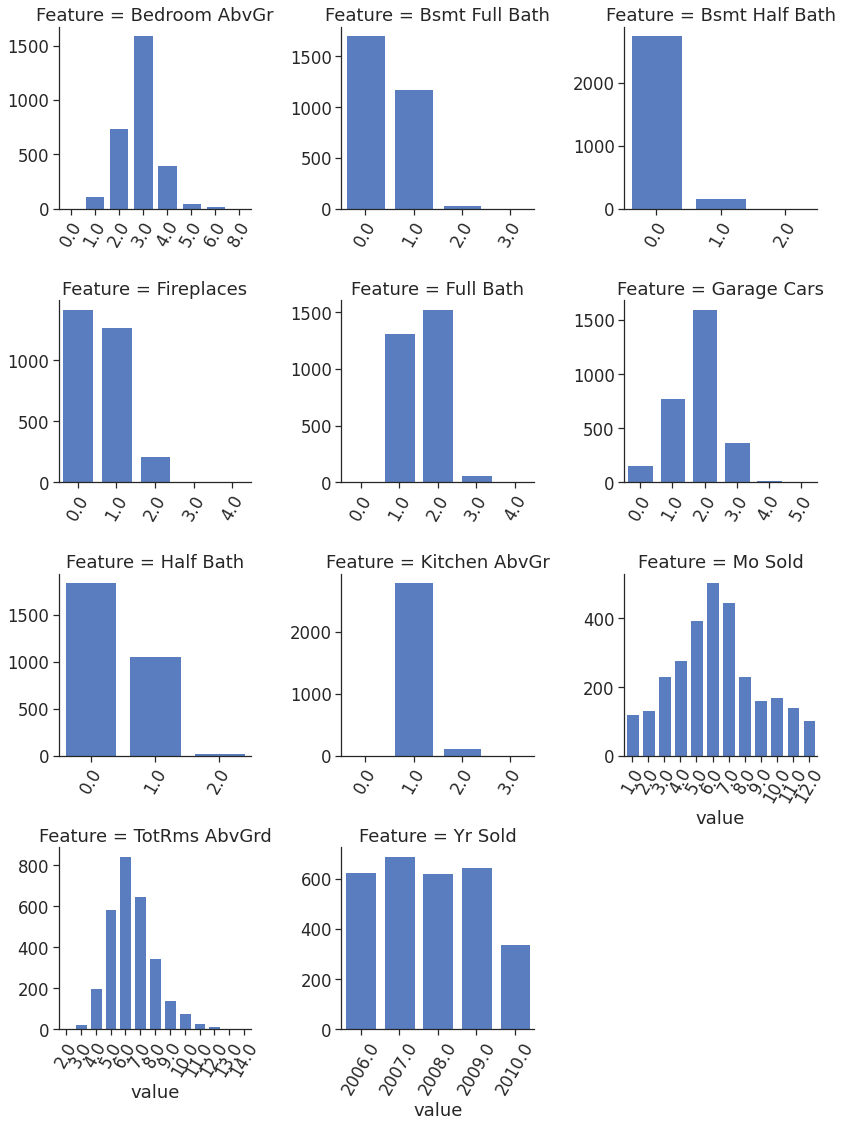

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True, font_scale =1.5)
dis_cat_features = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold','Yr Sold']
x = pd.melt(df_housing, value_vars=sorted(dis_cat_features), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height = 4)
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

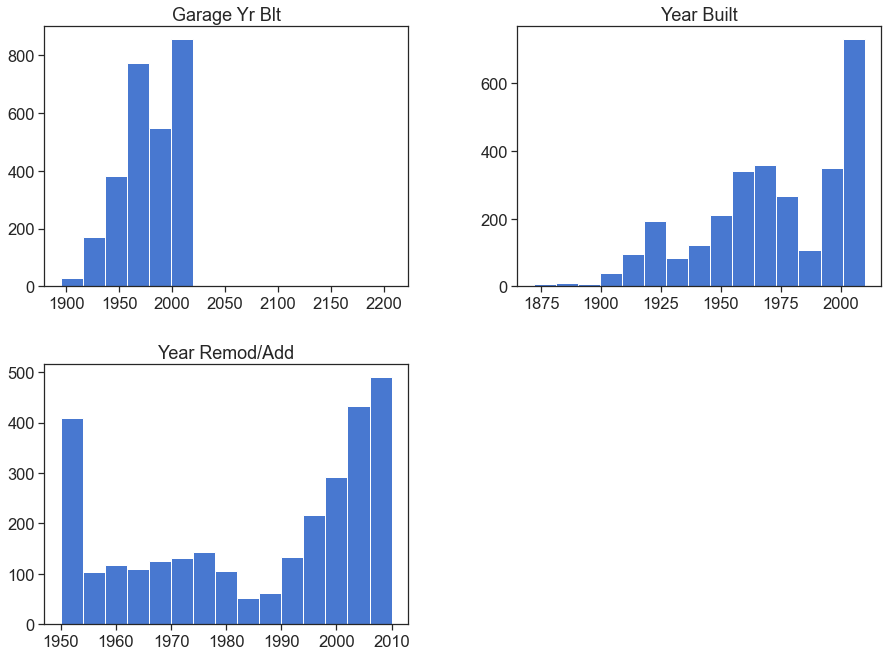

In [ ]:
df_housing.hist(column = ['Year Built','Garage Yr Blt','Year Remod/Add'], bins=15, grid=False, figsize=(15,11),layout=(2,2))
plt.show()

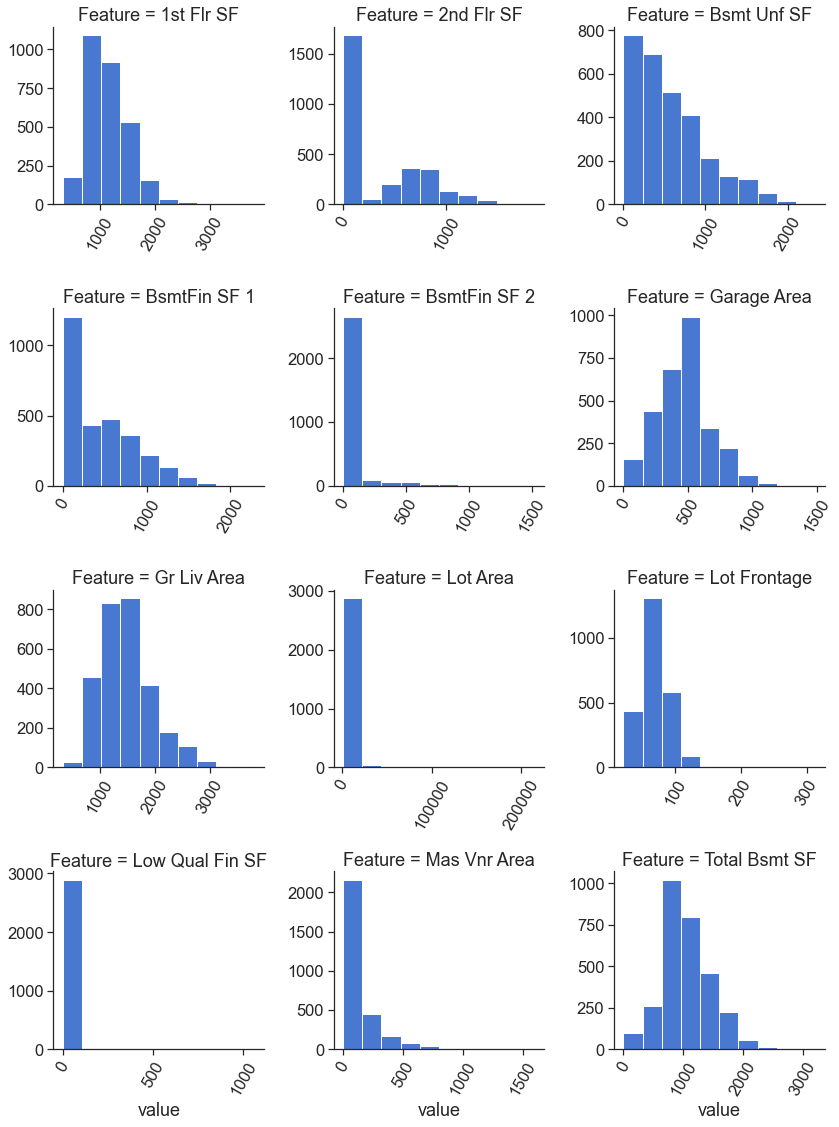

In [ ]:
cont_features = ['Lot Frontage','Mas Vnr Area','Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']#, 'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
x = pd.melt(df_housing, value_vars=sorted(cont_features), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height=4)
plt.xticks(rotation='vertical')
t = t.map(plt.hist,'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

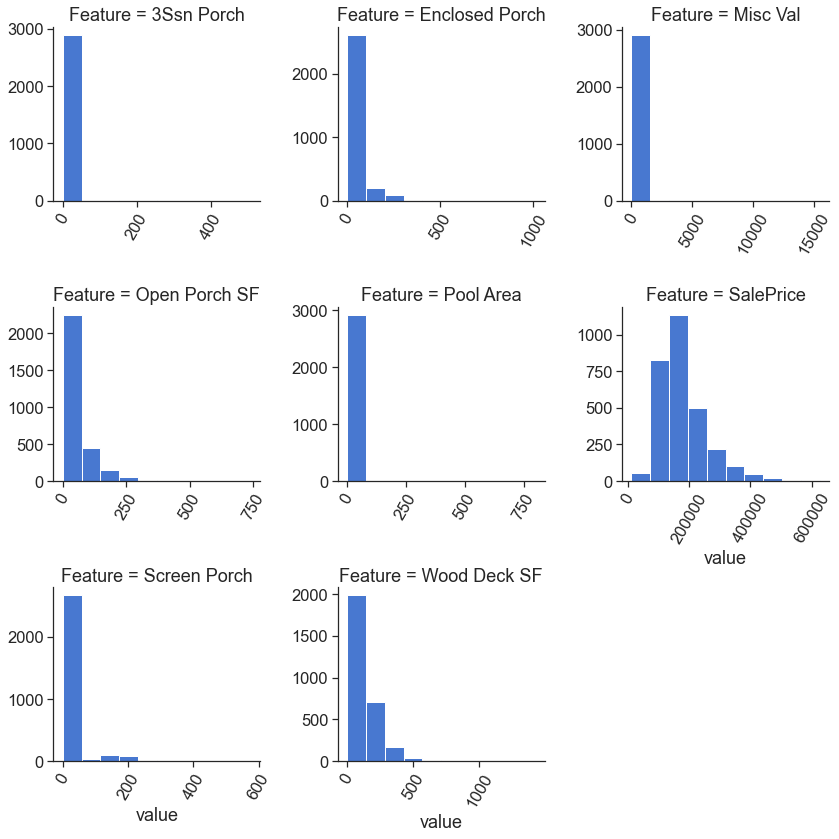

In [ ]:
cont_features = ['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
x = pd.melt(df_housing, value_vars=sorted(cont_features), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height=4)
plt.xticks(rotation='vertical')
t = t.map(plt.hist,'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

In [ ]:
np.around(df_housing[['Lot Frontage','Mas Vnr Area','Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']].describe(),2)

Lot Frontage  Mas Vnr Area  ...  Low Qual Fin SF  Gr Liv Area
count       2435.00       2902.00  ...          2925.00      2925.00
mean          69.02        100.71  ...             4.68      1493.98
std           22.71        176.03  ...            46.35       486.27
min           21.00          0.00  ...             0.00       334.00
25%           58.00          0.00  ...             0.00      1126.00
50%           68.00          0.00  ...             0.00      1441.00
75%           80.00        164.00  ...             0.00      1740.00
max          313.00       1600.00  ...          1064.00      3820.00

[8 rows x 12 columns]

In [ ]:
cont = ['Gr Liv Area', 'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
np.around(df_housing[cont].describe(),2)

Gr Liv Area  Wood Deck SF  Open Porch SF  ...  Pool Area  Misc Val  SalePrice
count      2925.00       2925.00        2925.00  ...    2925.00   2925.00    2925.00
mean       1493.98         93.39          47.17  ...       1.89     44.91  180411.57
std         486.27        126.03          66.57  ...      32.96    472.24   78554.86
min         334.00          0.00           0.00  ...       0.00      0.00   12789.00
25%        1126.00          0.00           0.00  ...       0.00      0.00  129500.00
50%        1441.00          0.00          27.00  ...       0.00      0.00  160000.00
75%        1740.00        168.00          70.00  ...       0.00      0.00  213500.00
max        3820.00       1424.00         742.00  ...     800.00  15500.00  625000.00

[8 rows x 9 columns]

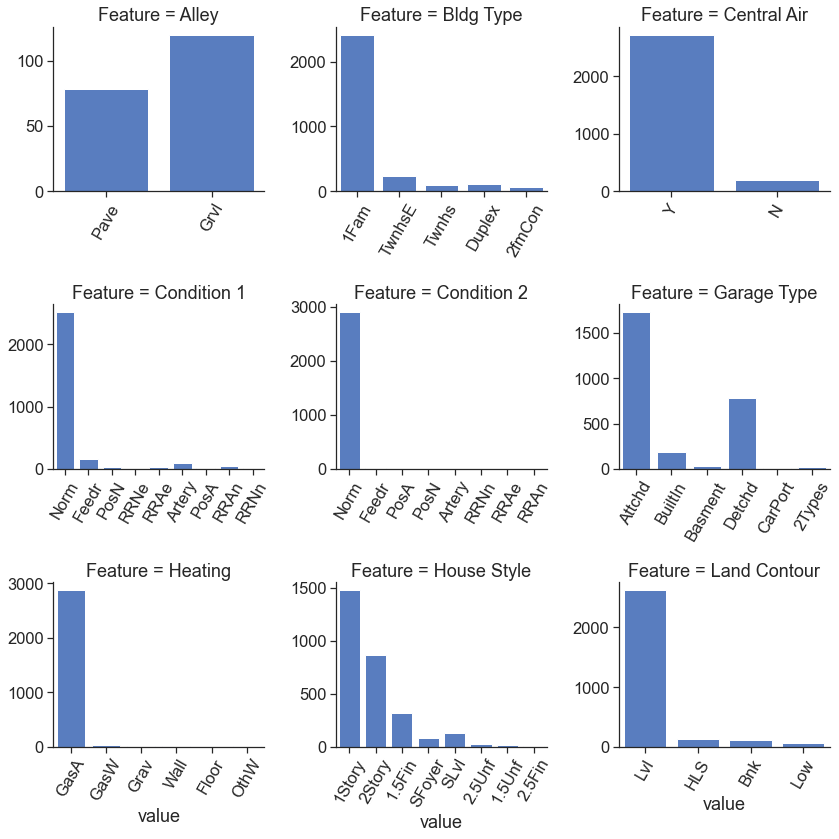

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True,font_scale =1.5)
dis_cat_features = ['Heating','Central Air','Alley','Land Contour','Garage Type','Condition 1','Condition 2','Bldg Type','House Style']
x = pd.melt(df_housing, value_vars=sorted(dis_cat_features), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height = 4)
plt.xticks(rotation='vertical')
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

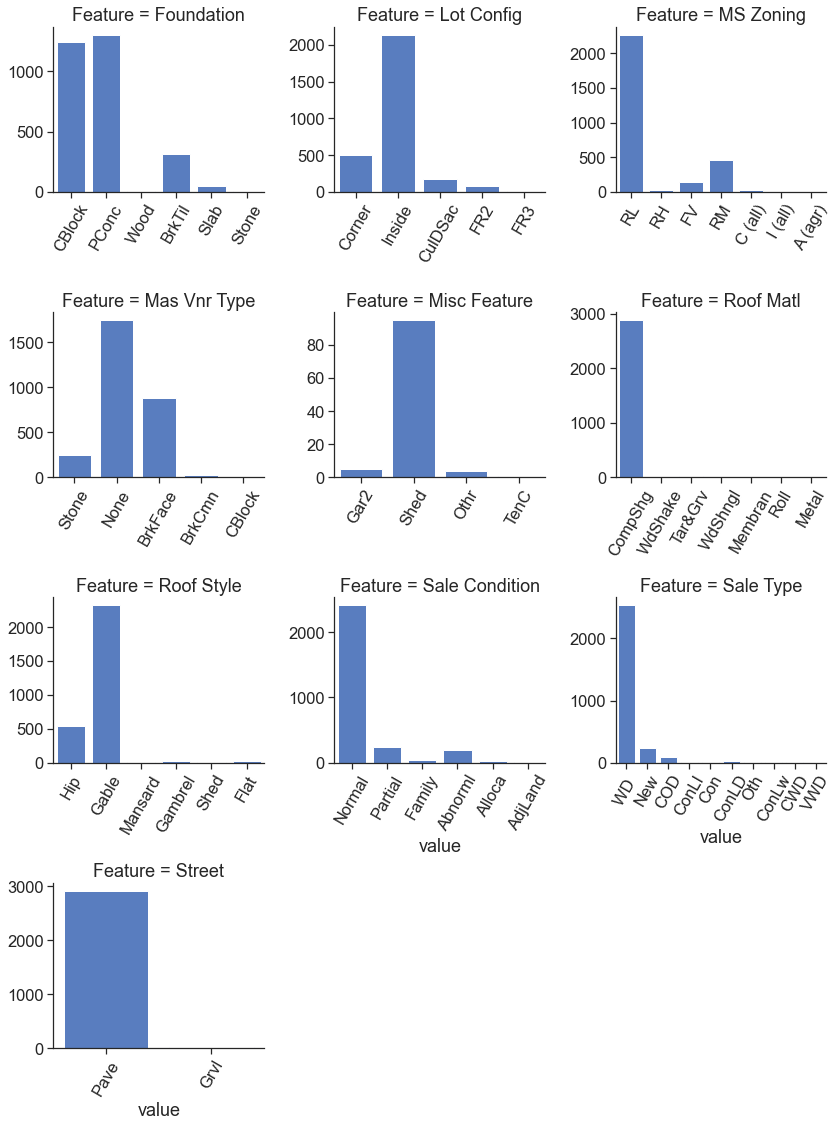

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True,font_scale =1.5)
dis_cat_features1 = ['Roof Style','Roof Matl','Mas Vnr Type','Foundation','MS Zoning','Street','Lot Config','Misc Feature','Sale Type','Sale Condition']
x = pd.melt(df_housing, value_vars=sorted(dis_cat_features1), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height = 4)
plt.xticks(rotation='vertical')
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

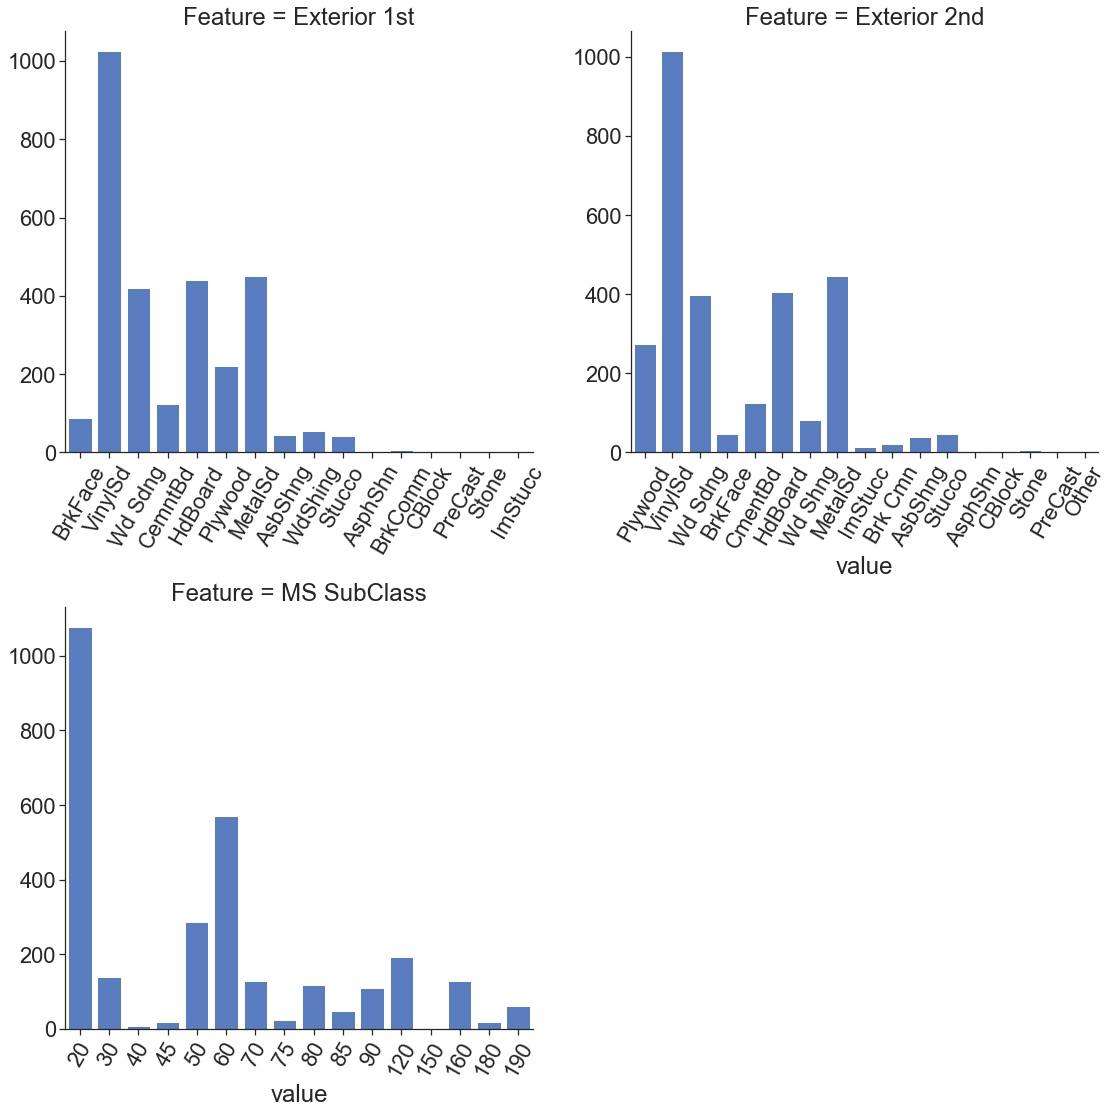

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True,font_scale =2)
dis_cat_features2 = ['Exterior 1st','Exterior 2nd','MS SubClass']
x = pd.melt(df_housing, value_vars=sorted(dis_cat_features2), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=2, sharex=False, sharey=False, height = 8 )
plt.xticks(rotation='vertical')
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

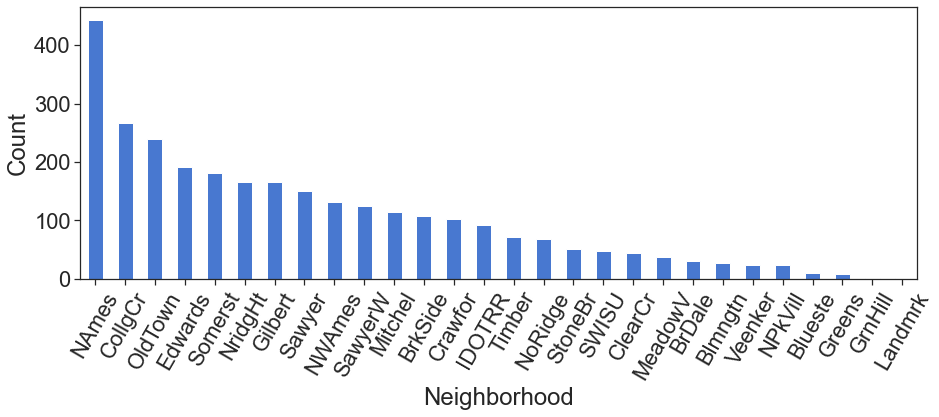

In [ ]:
plt.figure(figsize = (15,5))
df_housing['Neighborhood'].value_counts().plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.show()

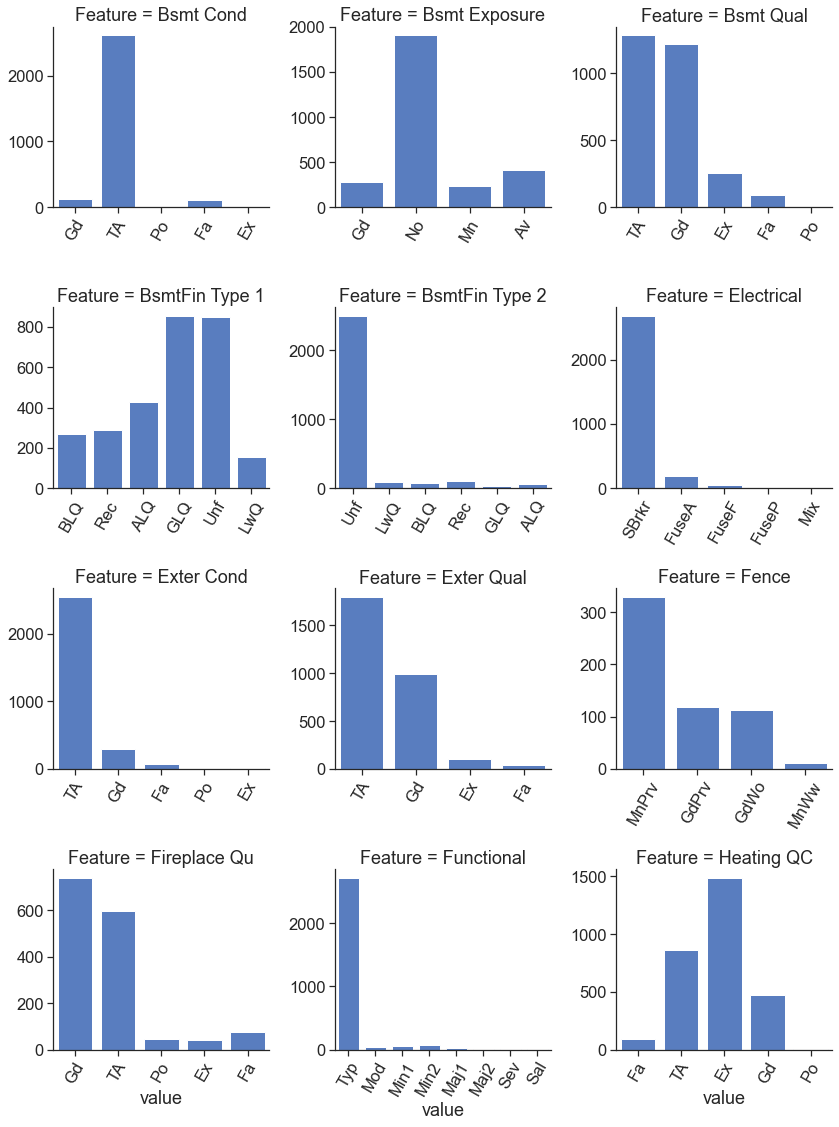

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True, font_scale =1.5)
ord_cat_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Fence','Fireplace Qu','Functional']

x = pd.melt(df_housing, value_vars=sorted(ord_cat_features), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height = 4)
plt.xticks(rotation='vertical')
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

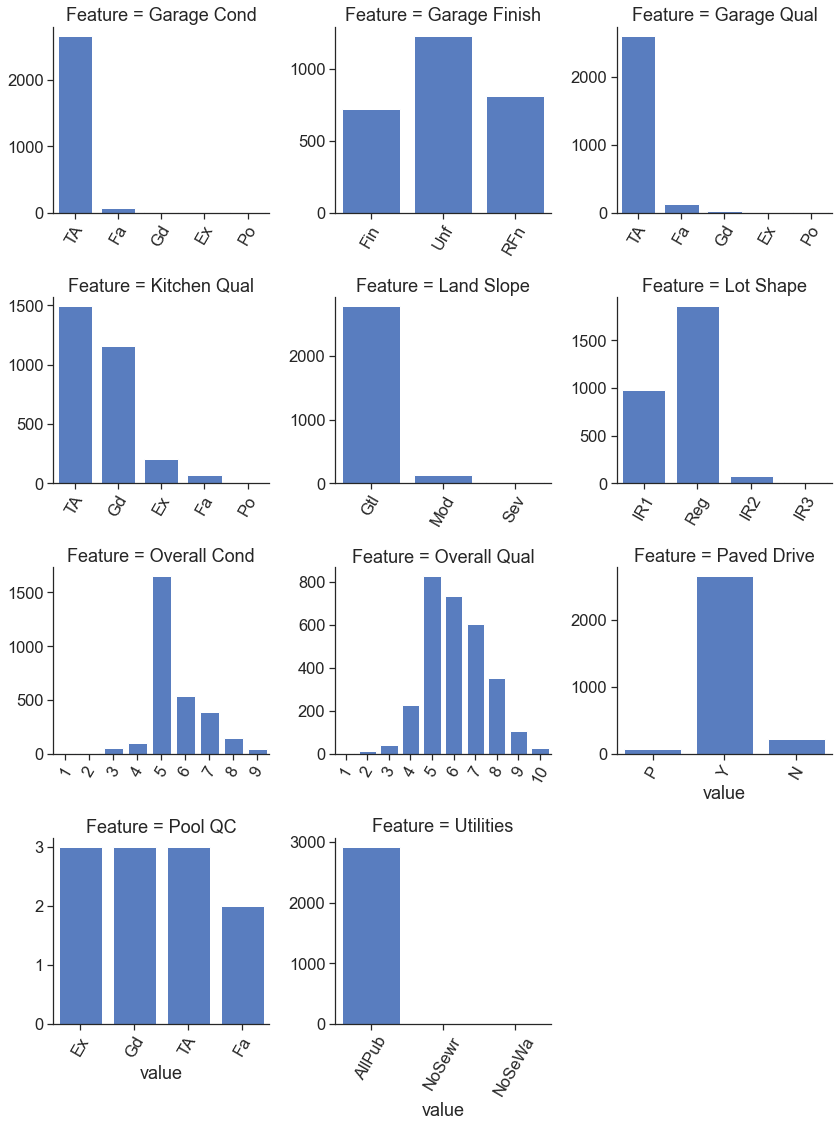

In [ ]:
sns.set(style="ticks", palette='muted', color_codes=True, font_scale =1.5)
ord_cat_features1 = ['Lot Shape', 'Utilities', 'Land Slope','Overall Qual','Overall Cond','Kitchen Qual','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC']

x = pd.melt(df_housing, value_vars=sorted(ord_cat_features1), var_name = 'Feature')
t = sns.FacetGrid(x, col='Feature', col_wrap=3, sharex=False, sharey=False, height = 4)
plt.xticks(rotation='vertical')
t = t.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in t.axes.flat]
t.fig.tight_layout()
plt.show()

Bivariate Analysis

In [ ]:
cont_features1 = ['Low Qual Fin SF','Gr Liv Area', 'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
cont_features2 = ['Lot Frontage','Mas Vnr Area','Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Lot Area','1st Flr SF','2nd Flr SF', 'SalePrice']
cont_f = ['Lot Frontage','Mas Vnr Area','Garage Area','Total Bsmt SF','Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1','Lot Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area', 'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']

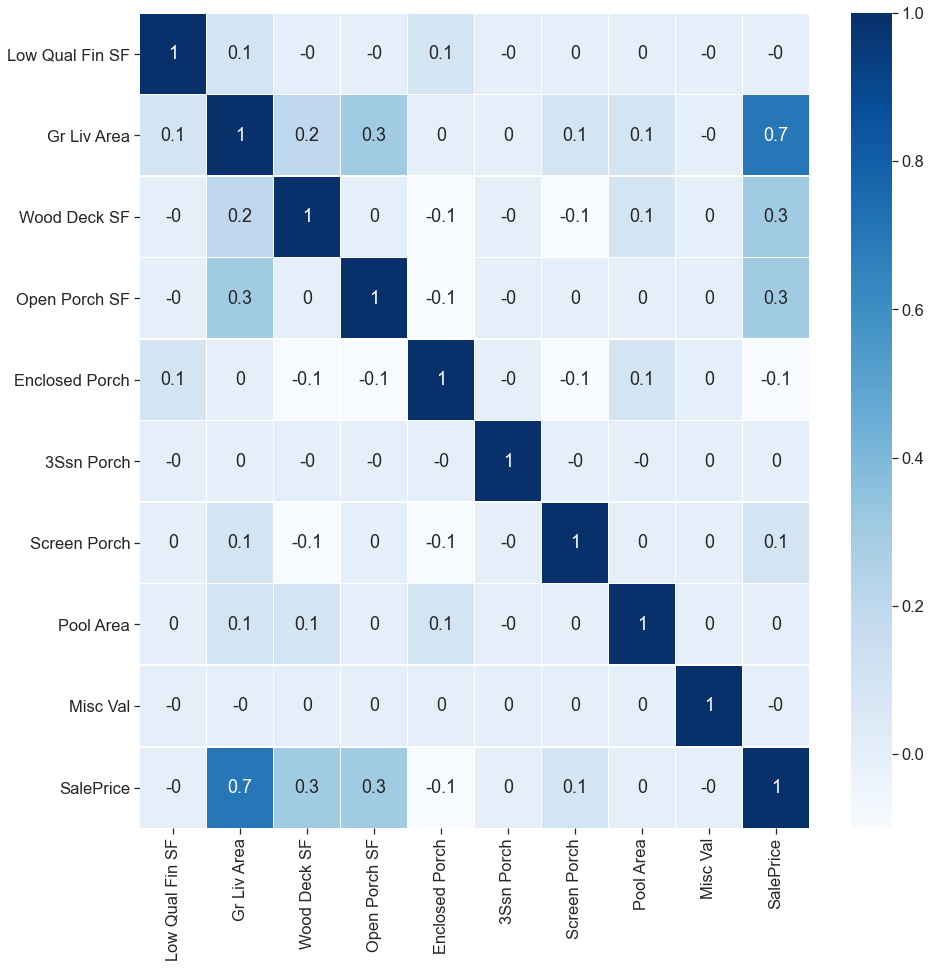

In [ ]:
fig, a = plt.subplots(figsize=(15,15))
sns.heatmap(np.around(df_housing[cont_features1].corr(), 1), linewidths = .5, annot = True, cmap = 'Blues', ax = a)
plt.show()

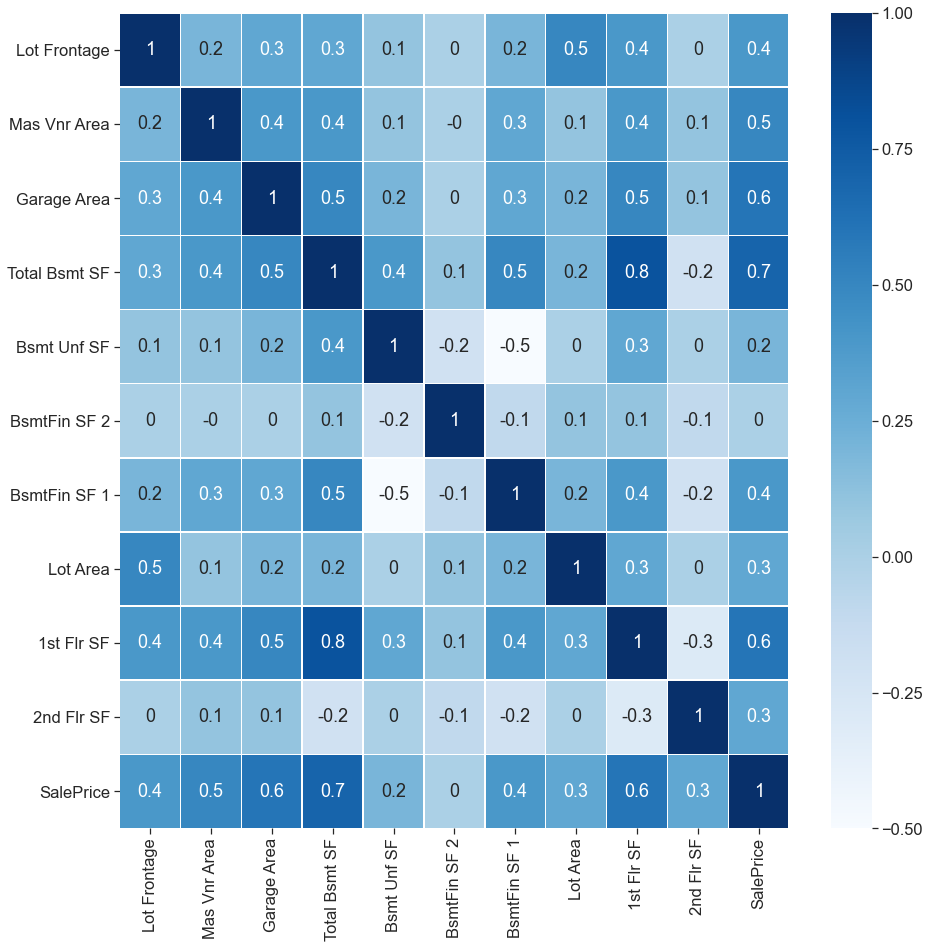

In [ ]:
fig, a = plt.subplots(figsize=(15,15))
sns.heatmap(np.around(df_housing[cont_features2].corr(), 1), linewidths = .5, annot = True, cmap = 'Blues', ax = a)
plt.show()

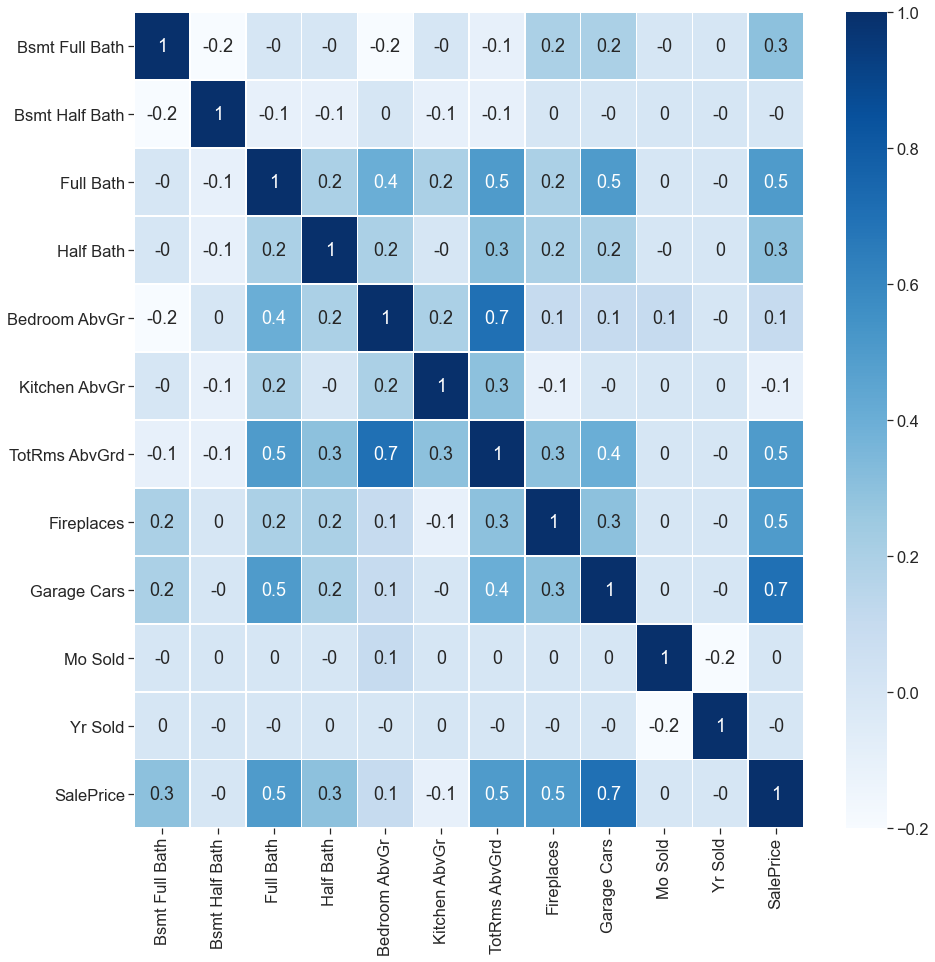

In [ ]:
cont_d = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold','Yr Sold','SalePrice']
fig, a = plt.subplots(figsize=(15,15))
sns.heatmap(np.around(df_housing[cont_d].corr(), 1), linewidths = .5, annot = True, cmap = 'Blues', ax = a)
plt.show()

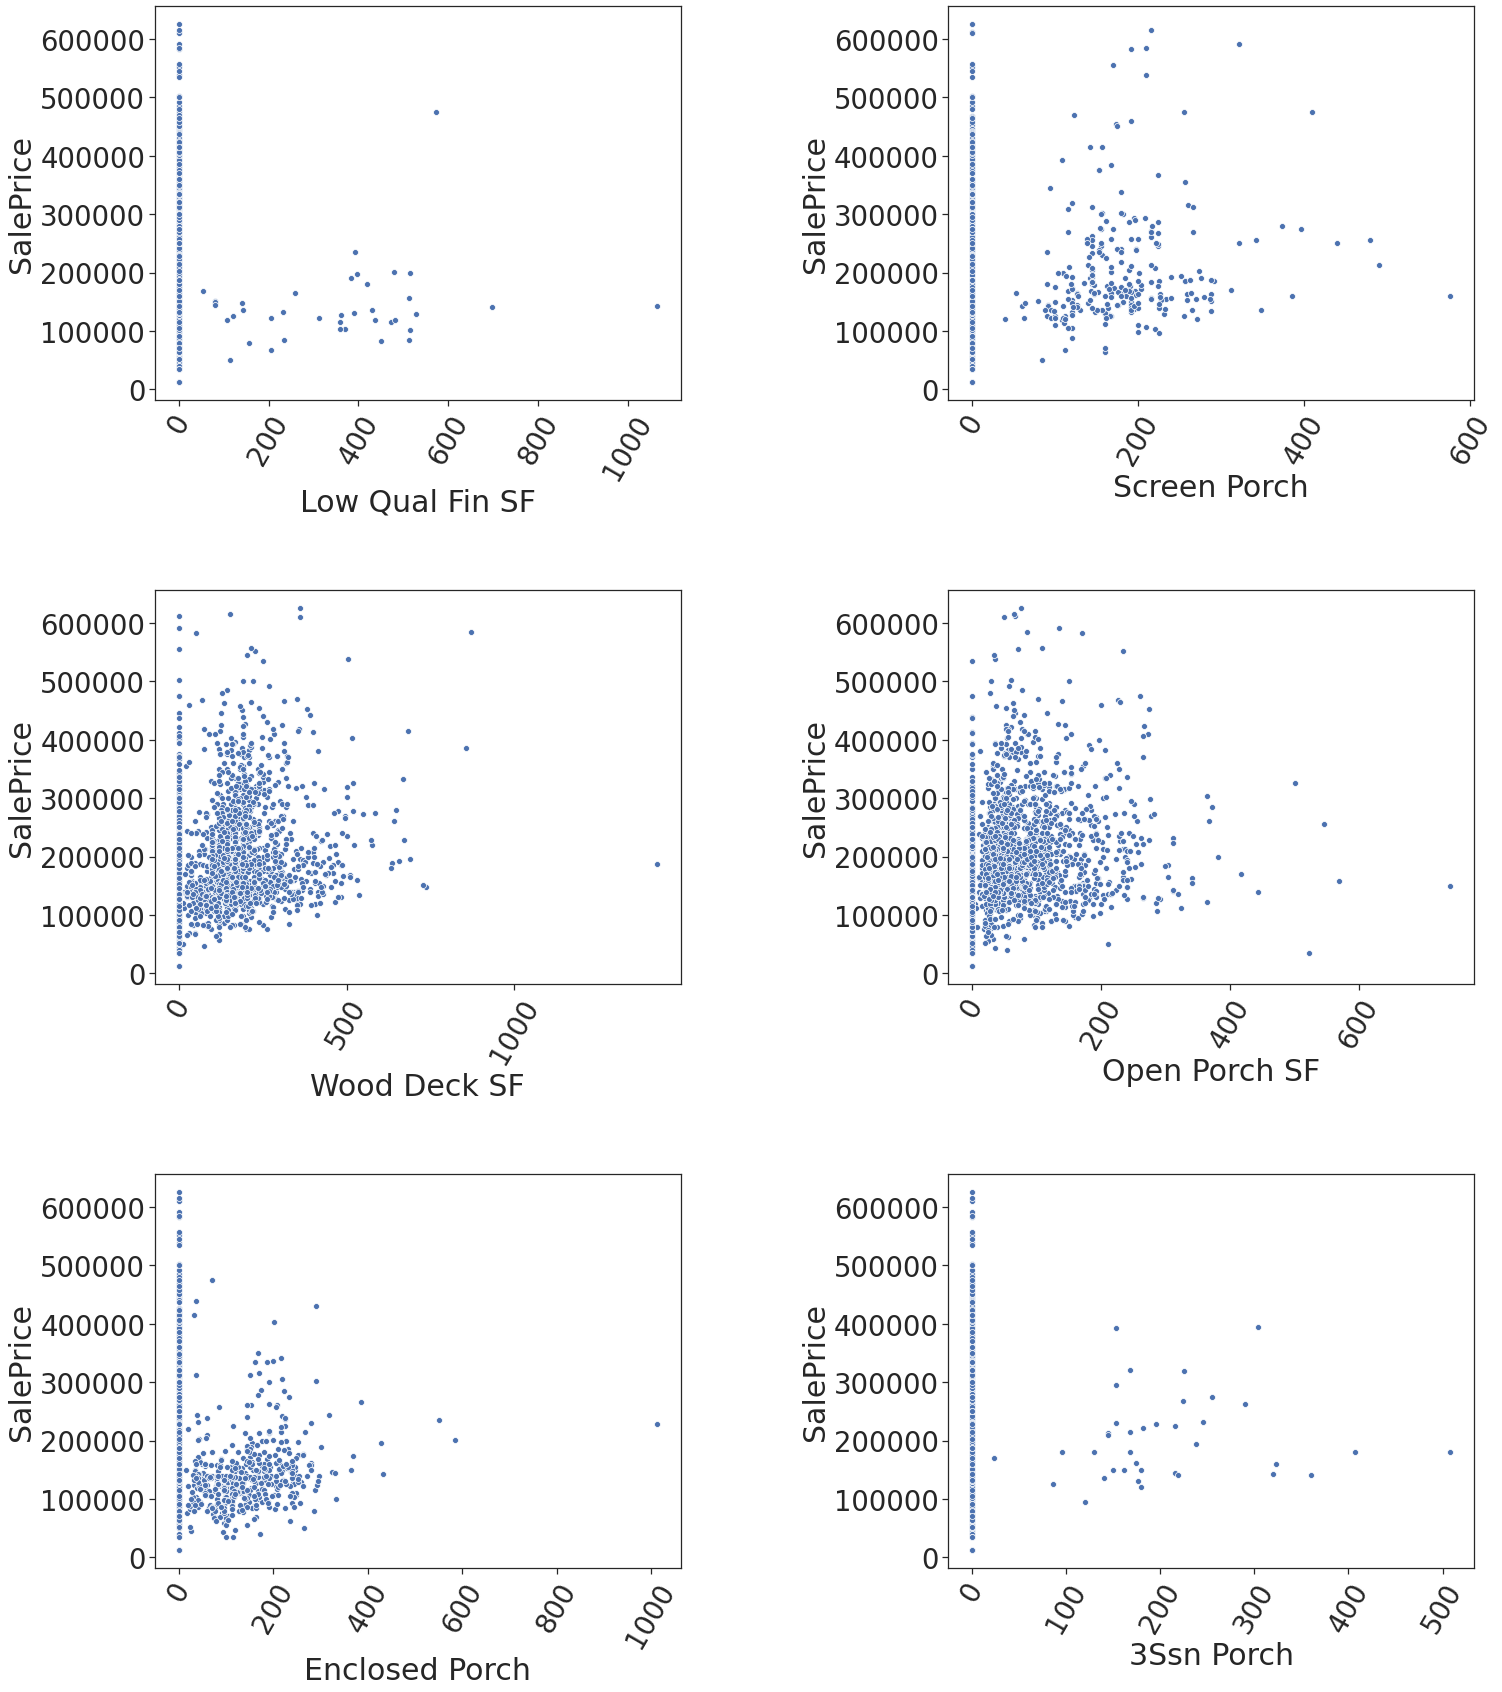

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.scatterplot(x ="Low Qual Fin SF", y = "SalePrice", data=df_housing, ax=ax[0,0])
sns.scatterplot(x = "Screen Porch", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.scatterplot(x = "Wood Deck SF", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.scatterplot(x = "Open Porch SF", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.scatterplot(x = "Enclosed Porch", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.scatterplot(x = "3Ssn Porch", y = "SalePrice",  data=df_housing, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

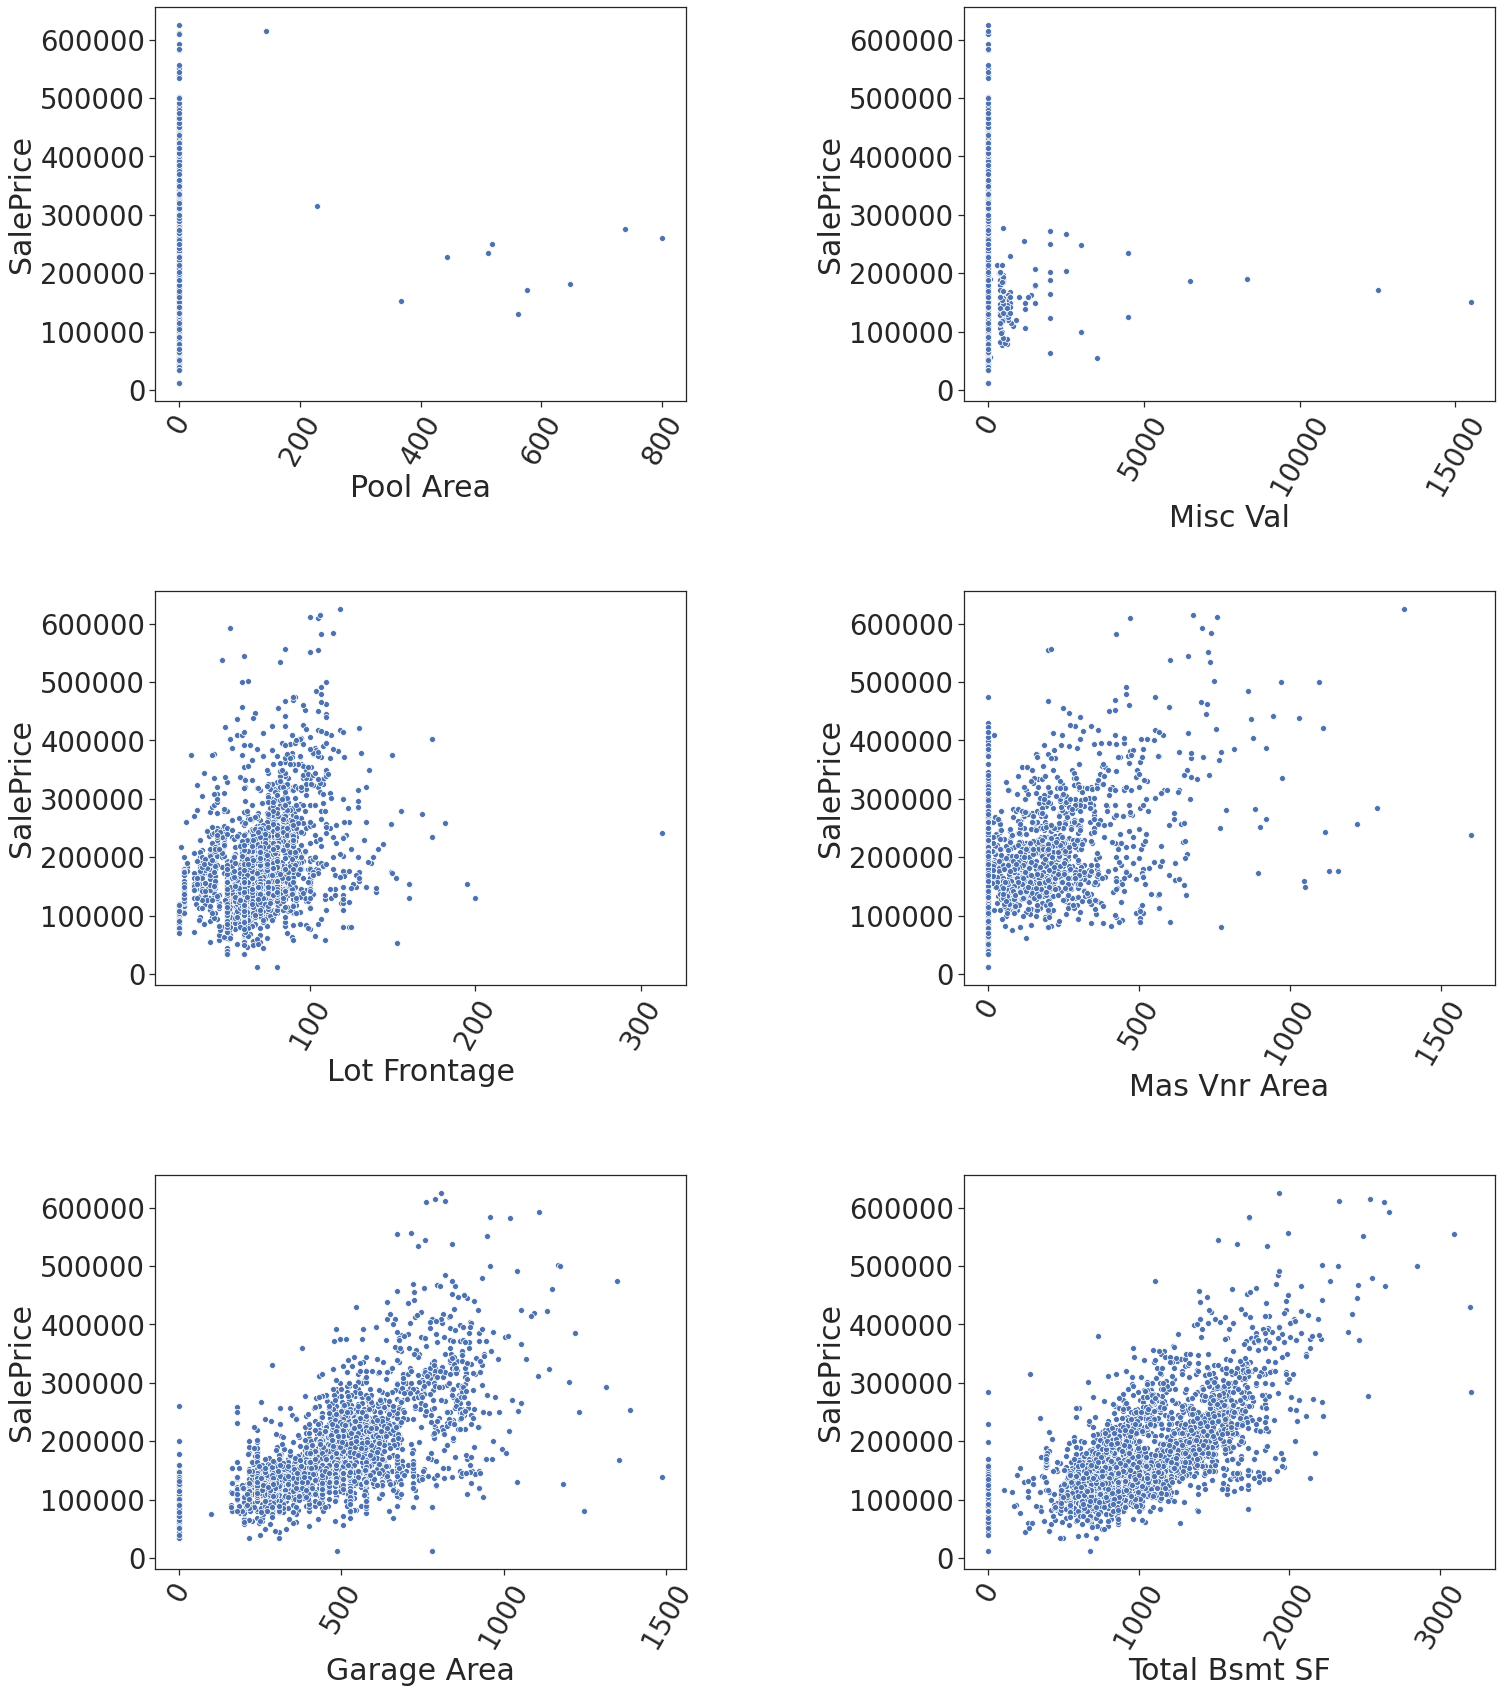

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.scatterplot(x ="Pool Area", y = "SalePrice", data=df_housing, ax=ax[0,0])
sns.scatterplot(x = "Misc Val", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.scatterplot(x = "Lot Frontage", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.scatterplot(x = "Mas Vnr Area", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.scatterplot(x = "Garage Area", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.scatterplot(x = "Total Bsmt SF", y = "SalePrice",  data=df_housing, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

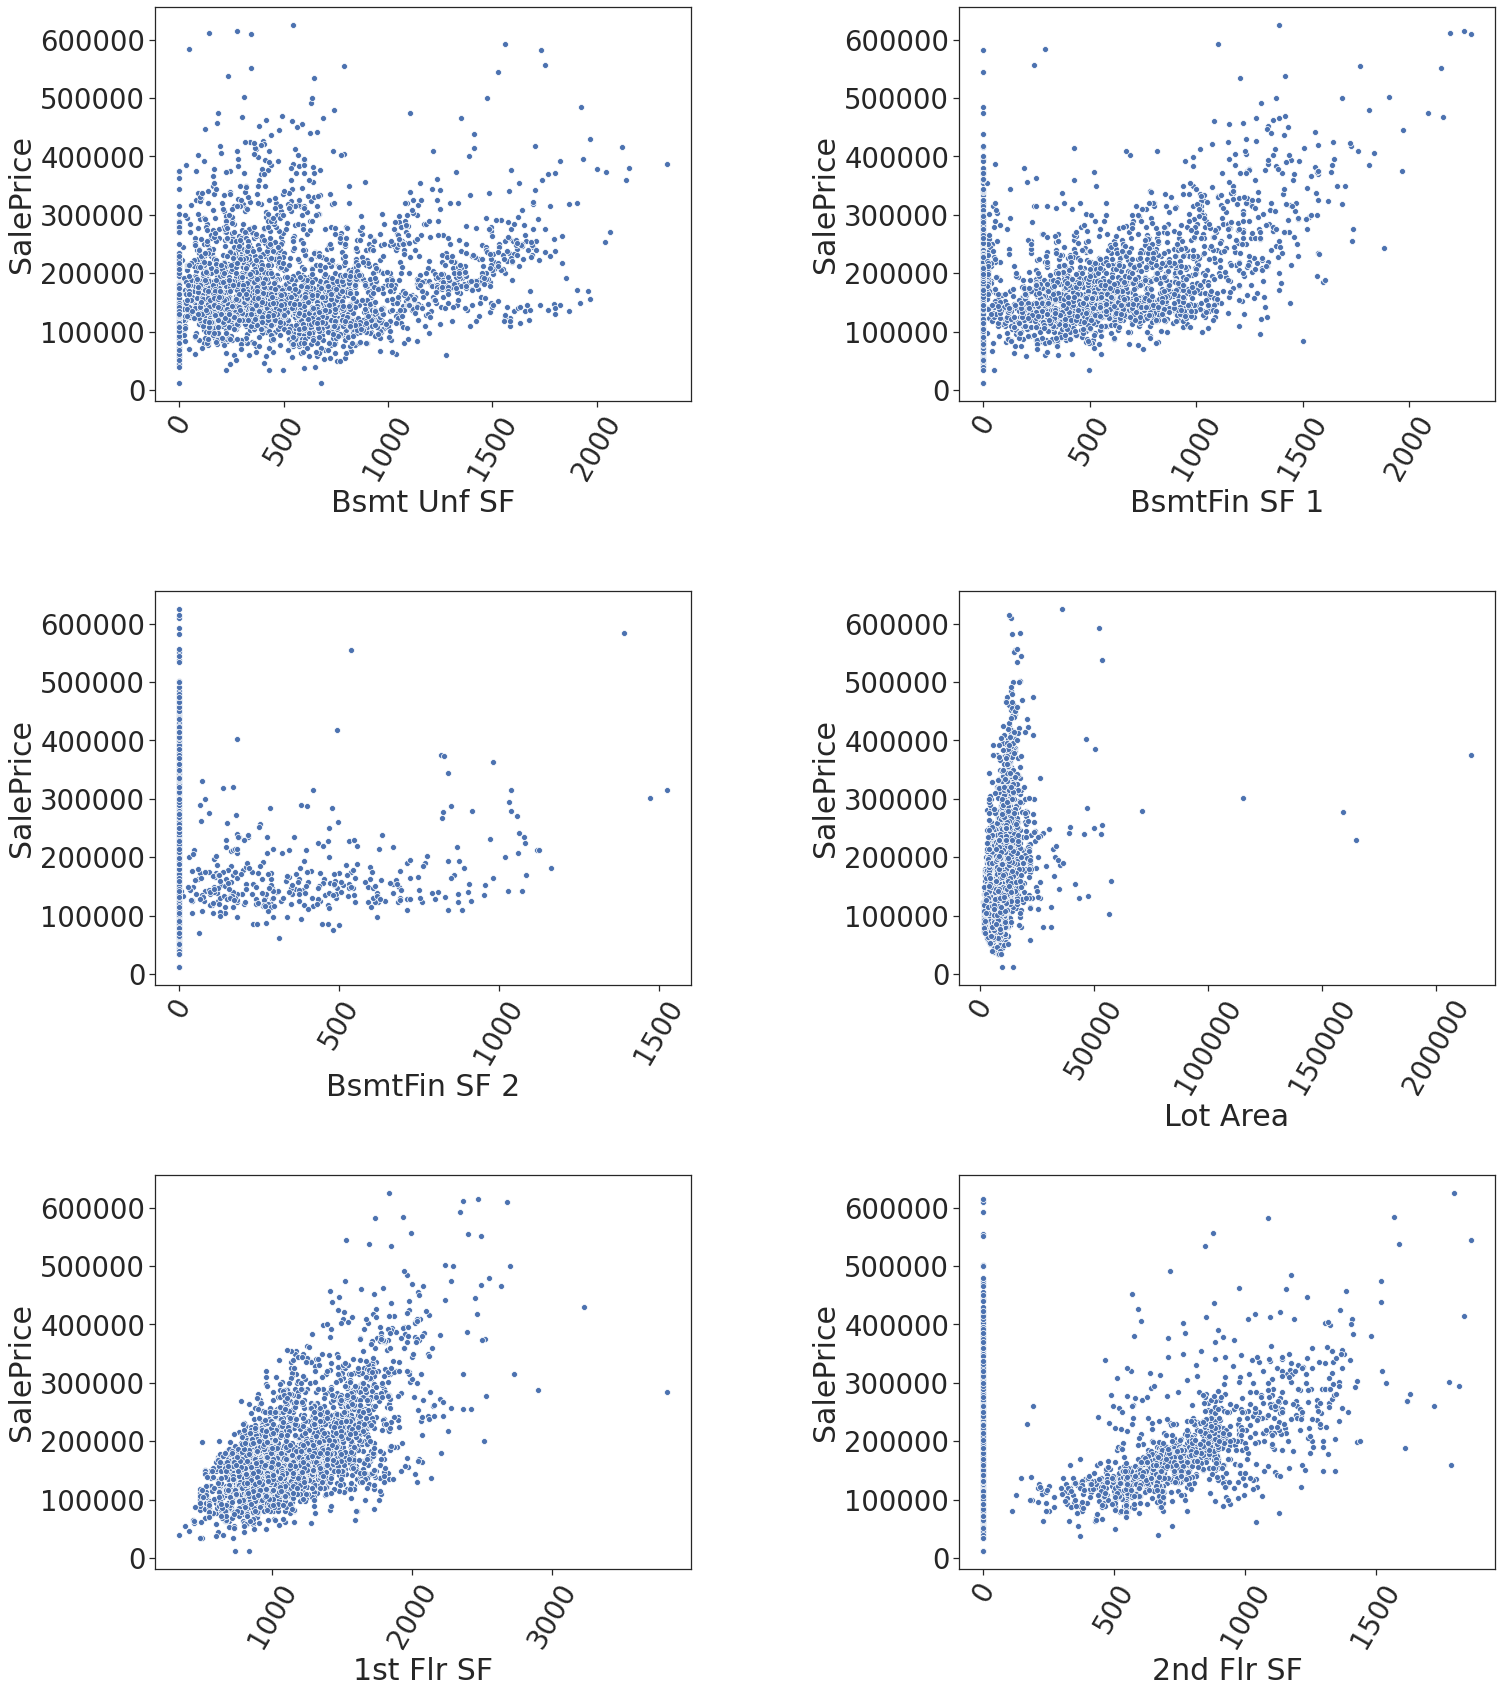

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.scatterplot(x ="Bsmt Unf SF", y = "SalePrice", data=df_housing, ax=ax[0,0])
sns.scatterplot(x = "BsmtFin SF 1", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.scatterplot(x = "BsmtFin SF 2", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.scatterplot(x = "Lot Area", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.scatterplot(x = "1st Flr SF", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.scatterplot(x = "2nd Flr SF", y = "SalePrice",  data=df_housing, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

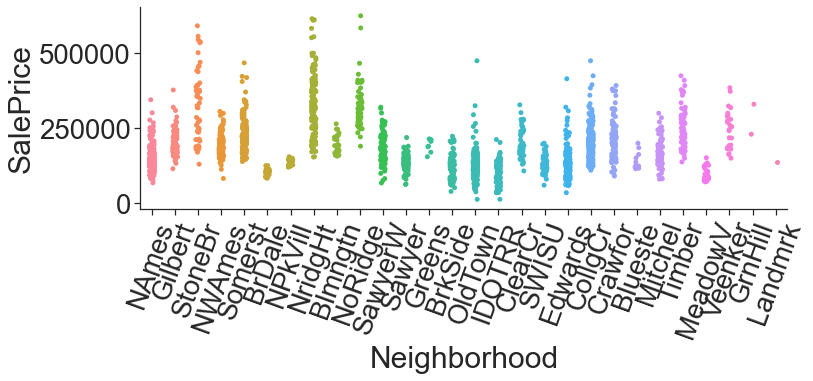

In [ ]:
sns.catplot(x='Neighborhood', y='SalePrice', data=df_housing, height = 6, aspect = 2)
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Plot/figure7a.png')
plt.show()



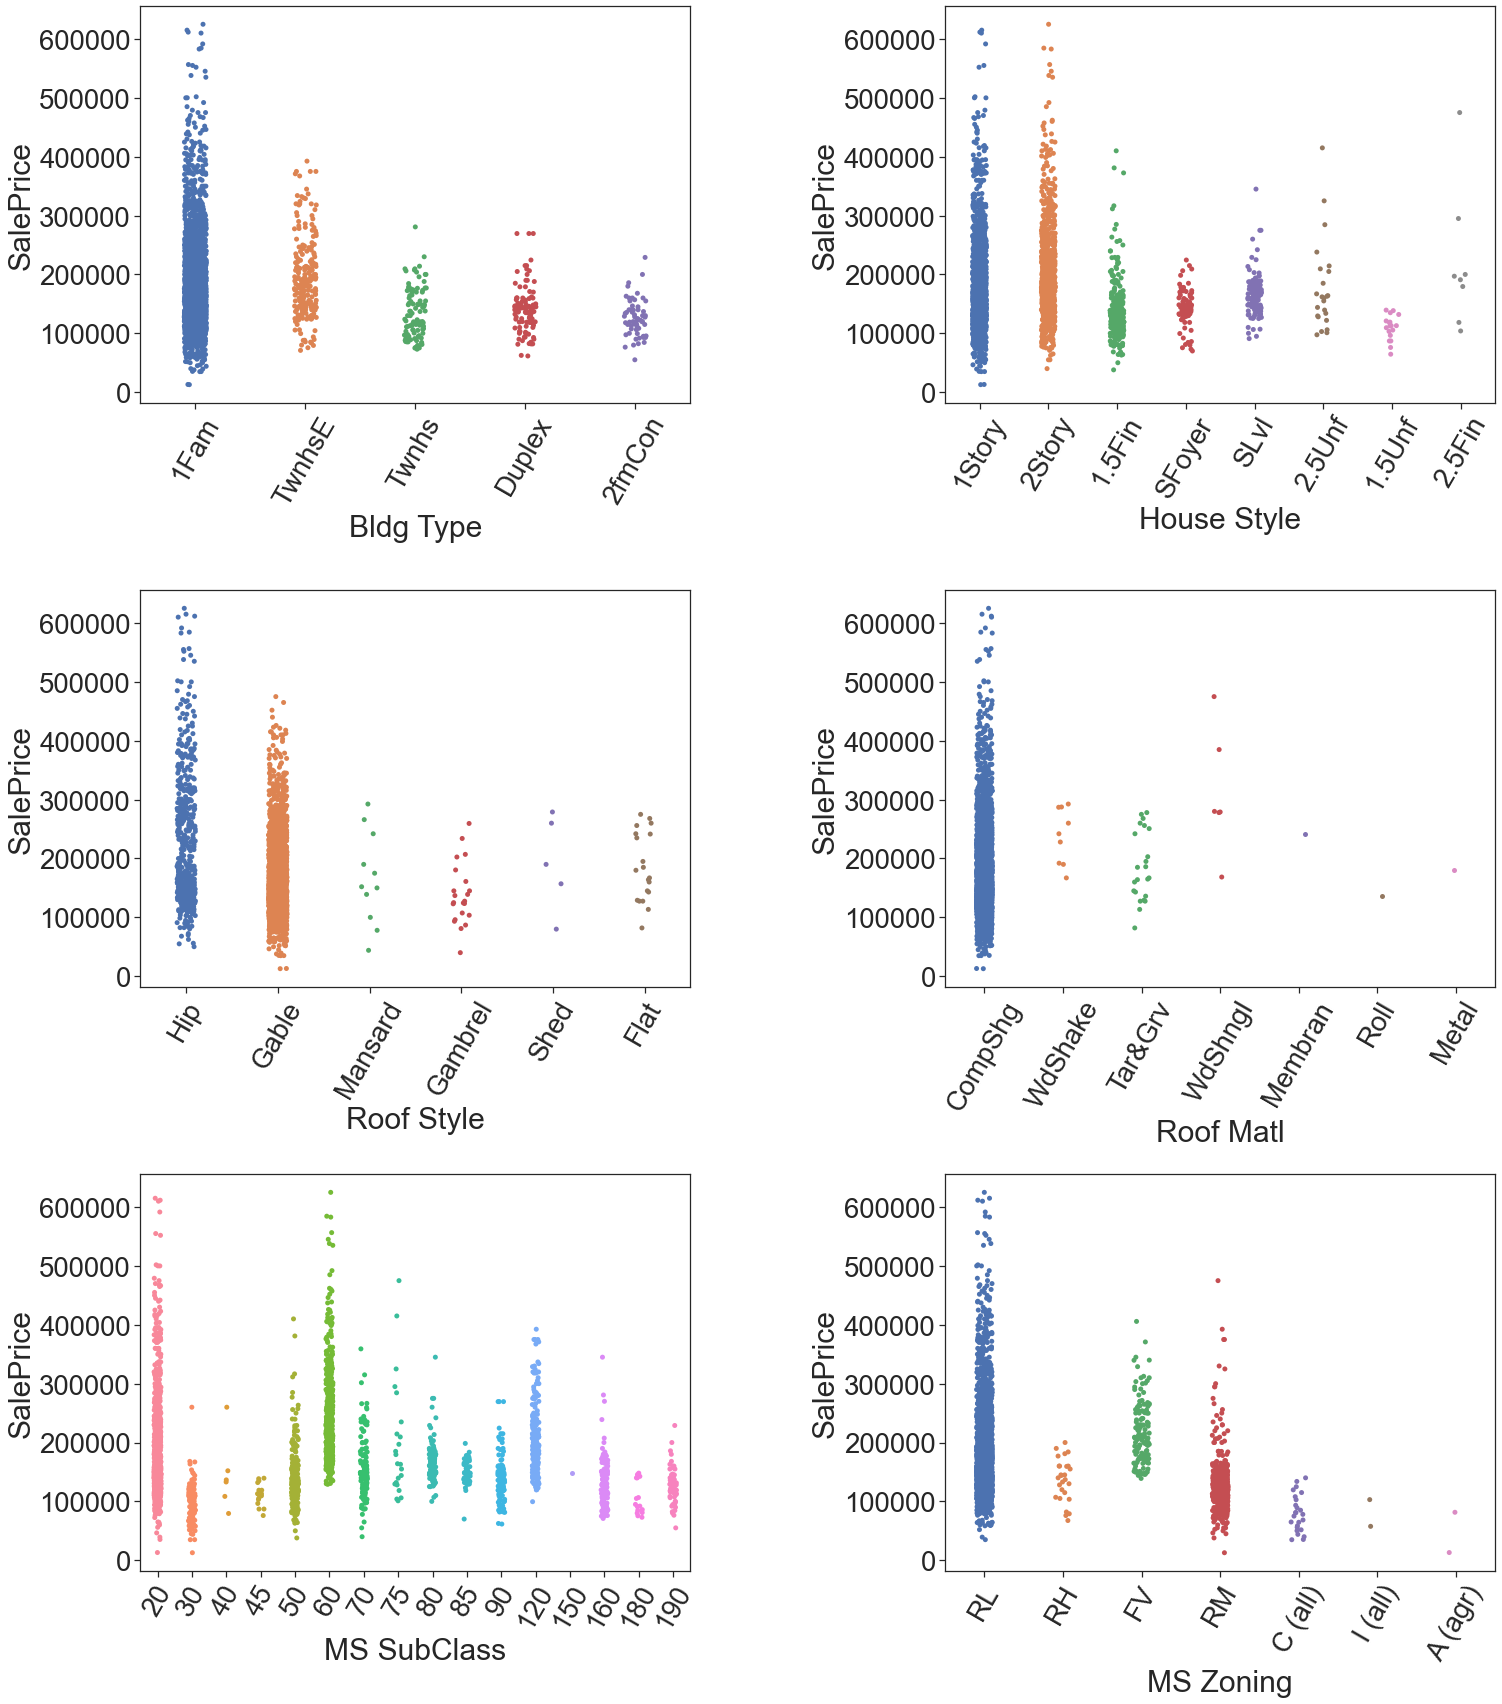

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.catplot(x = "Bldg Type", y = "SalePrice",  data=df_housing, ax=ax[0,0])
sns.catplot(x = "House Style", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Roof Style", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Roof Matl", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.catplot(x = "MS SubClass", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.catplot(x = "MS Zoning", y = "SalePrice",  data=df_housing, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.savefig('Plot/figure7b.png')
plt.show()

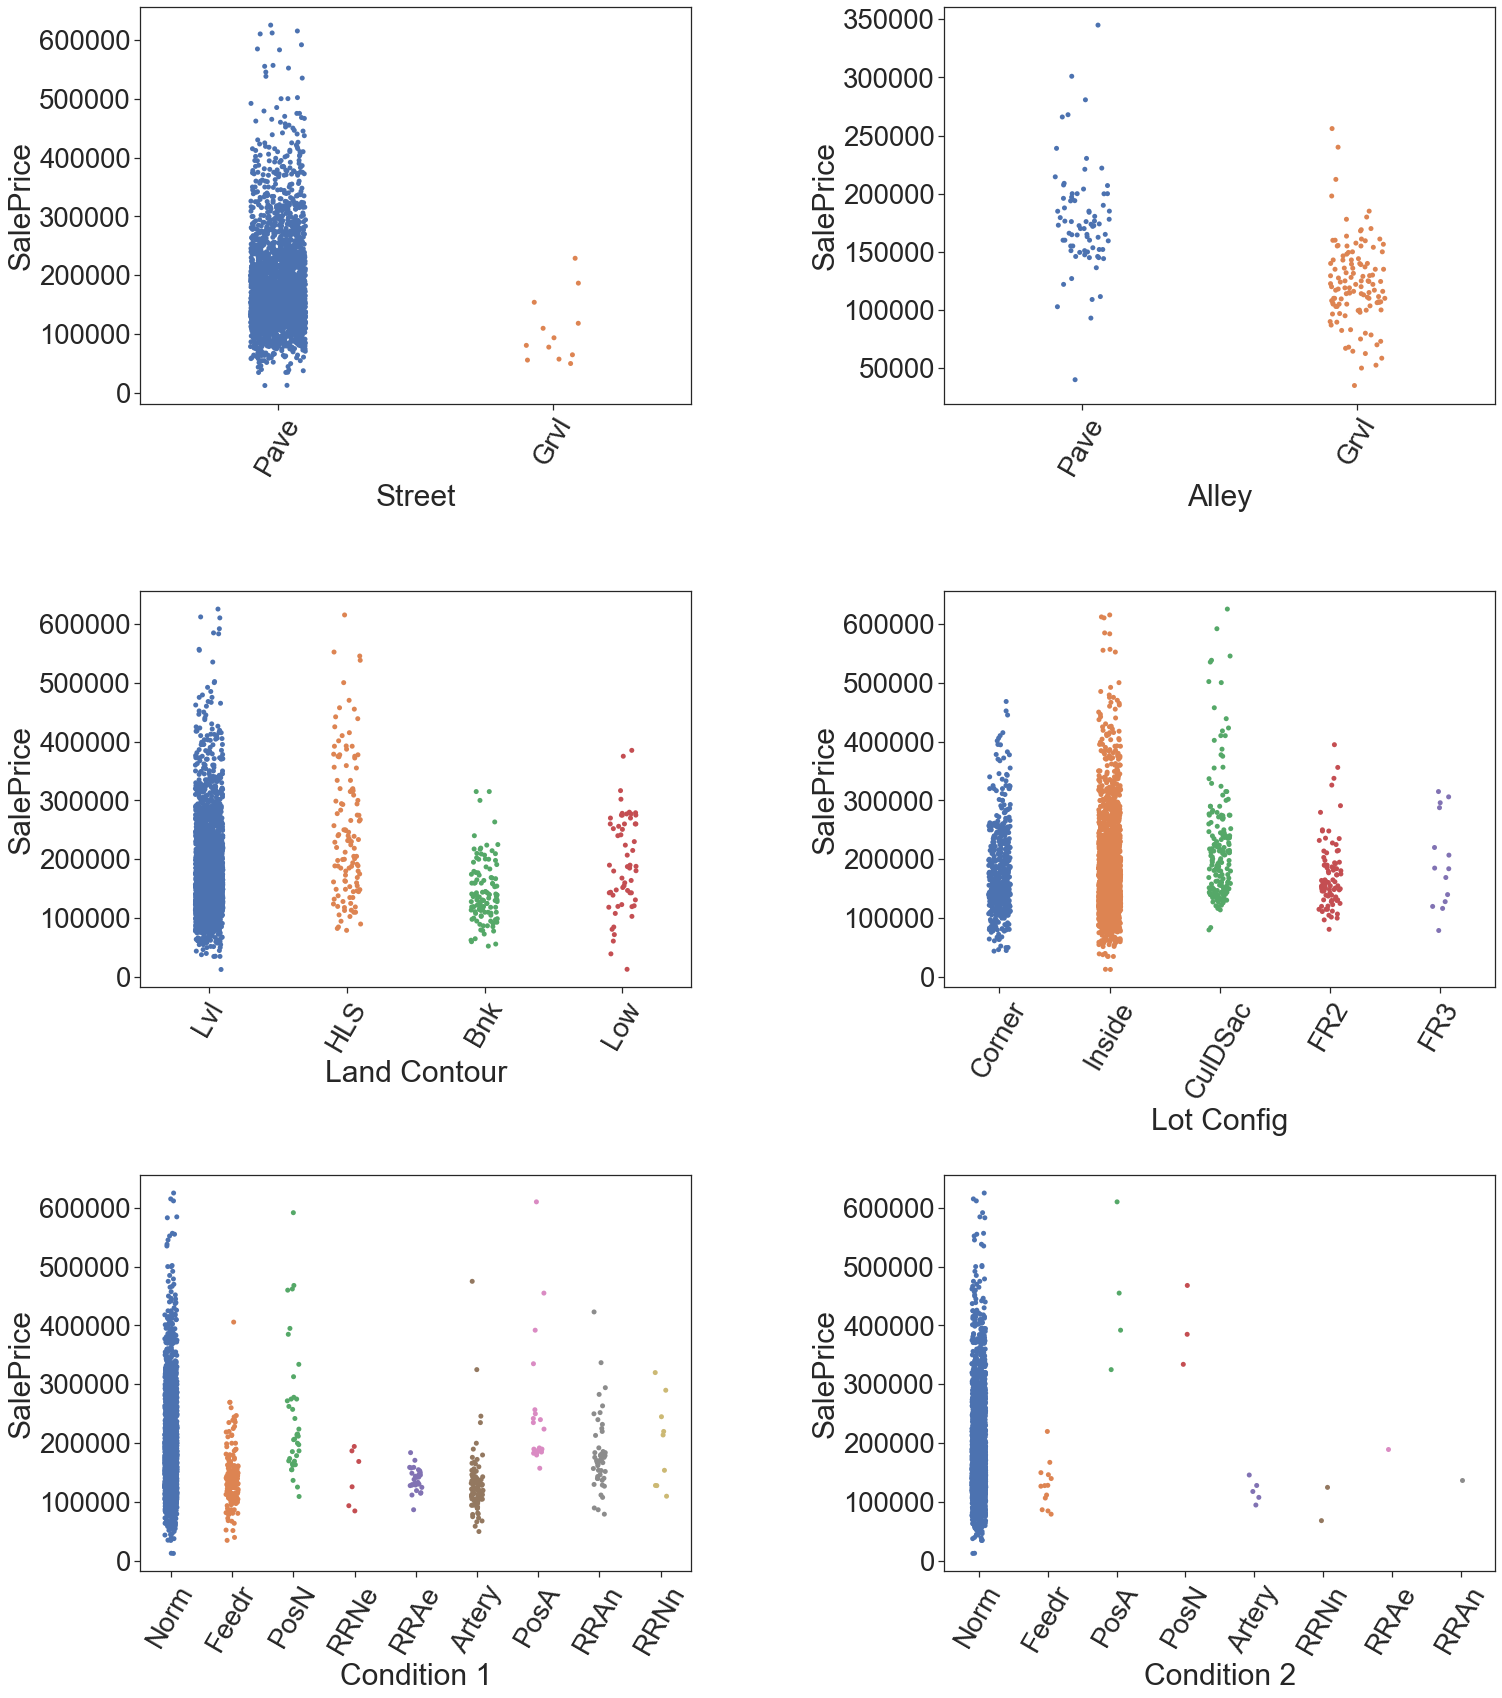

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.catplot(x = "Street", y = "SalePrice",  data=df_housing, ax=ax[0,0])
sns.catplot(x = "Alley", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Land Contour", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Lot Config", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.catplot(x = "Condition 1", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.catplot(x = "Condition 2", y = "SalePrice",  data=df_housing, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

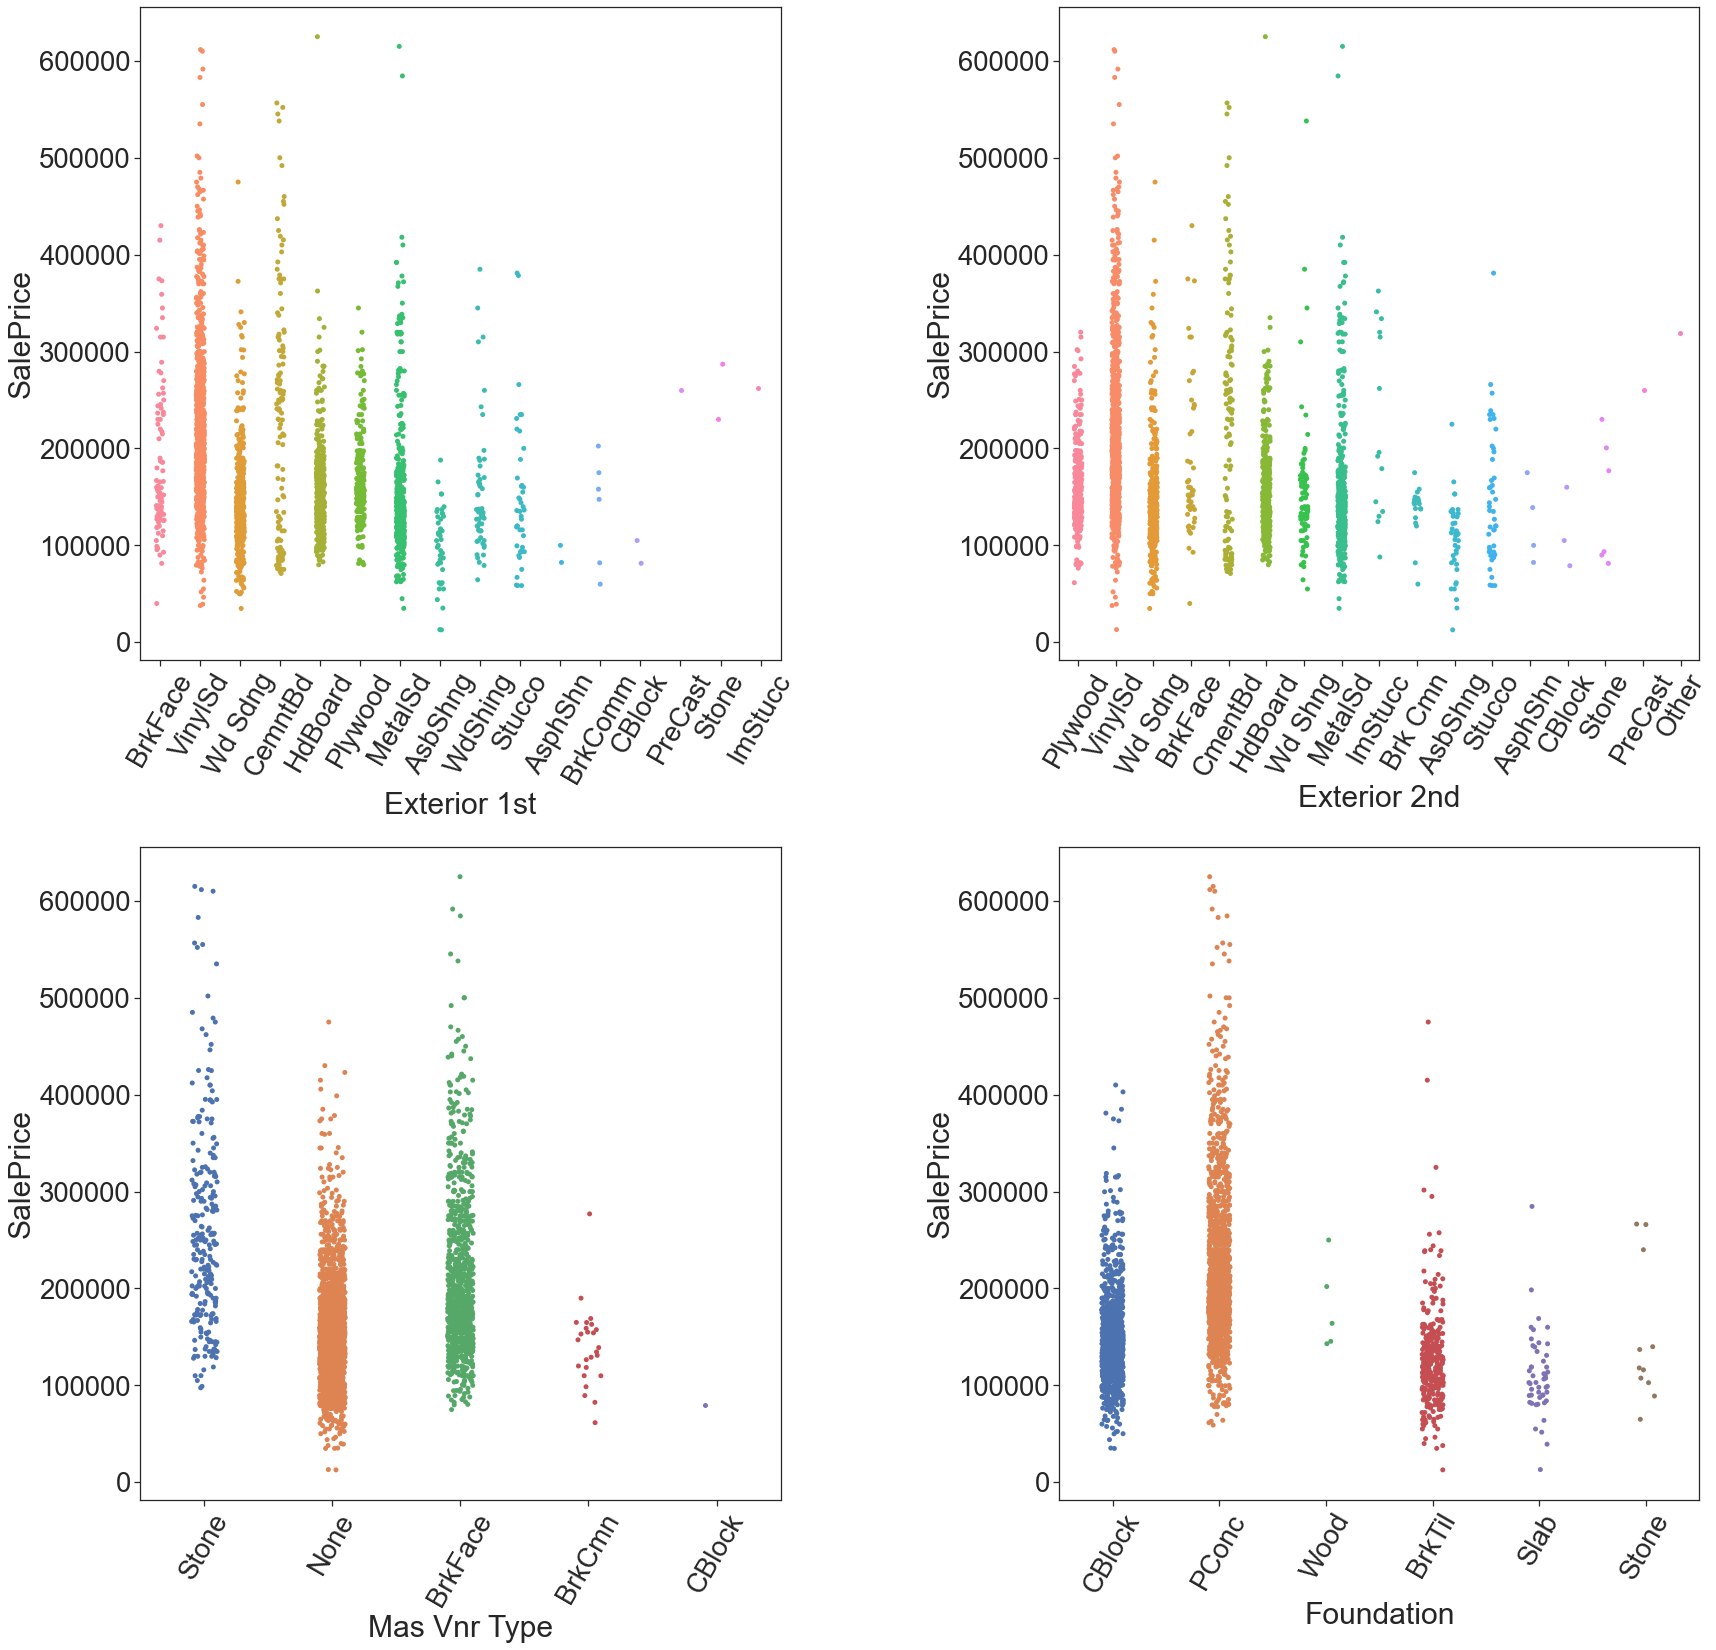

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(2,2, figsize=(27,25))
sns.catplot(x='Exterior 1st', y='SalePrice', data=df_housing, ax=ax[0,0])
sns.catplot(x='Exterior 2nd', y='SalePrice', data=df_housing, ax=ax[0,1])
sns.catplot(x='Mas Vnr Type', y='SalePrice', data=df_housing, ax=ax[1,0])
sns.catplot(x='Foundation', y='SalePrice', data=df_housing, ax=ax[1,1])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

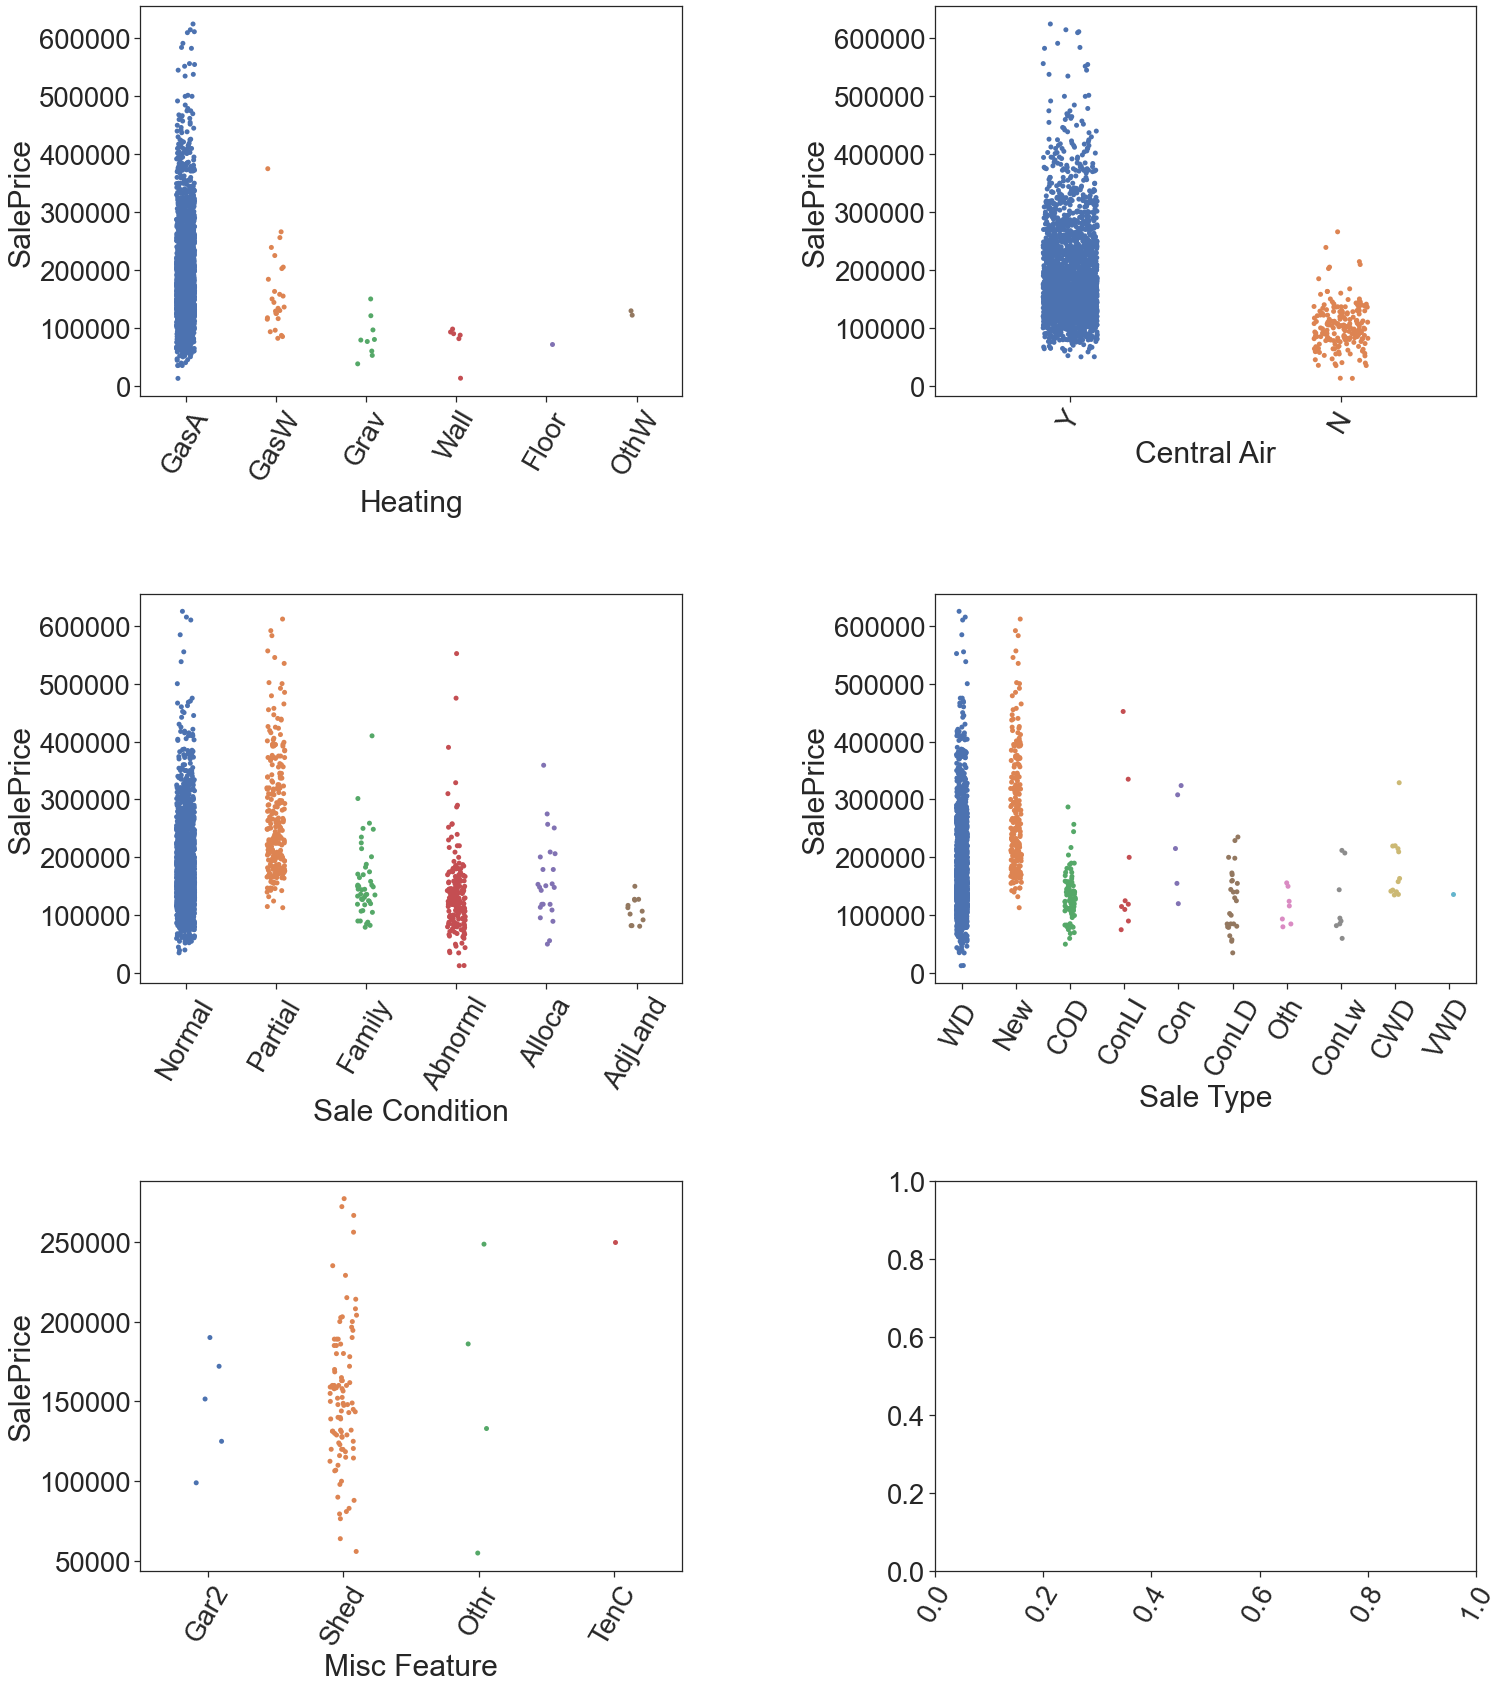

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.catplot(x = "Heating", y = "SalePrice",  data=df_housing, ax=ax[0,0])
sns.catplot(x = "Central Air", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Sale Condition", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Sale Type", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.catplot(x = "Misc Feature", y = "SalePrice",  data=df_housing, ax=ax[2,0])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

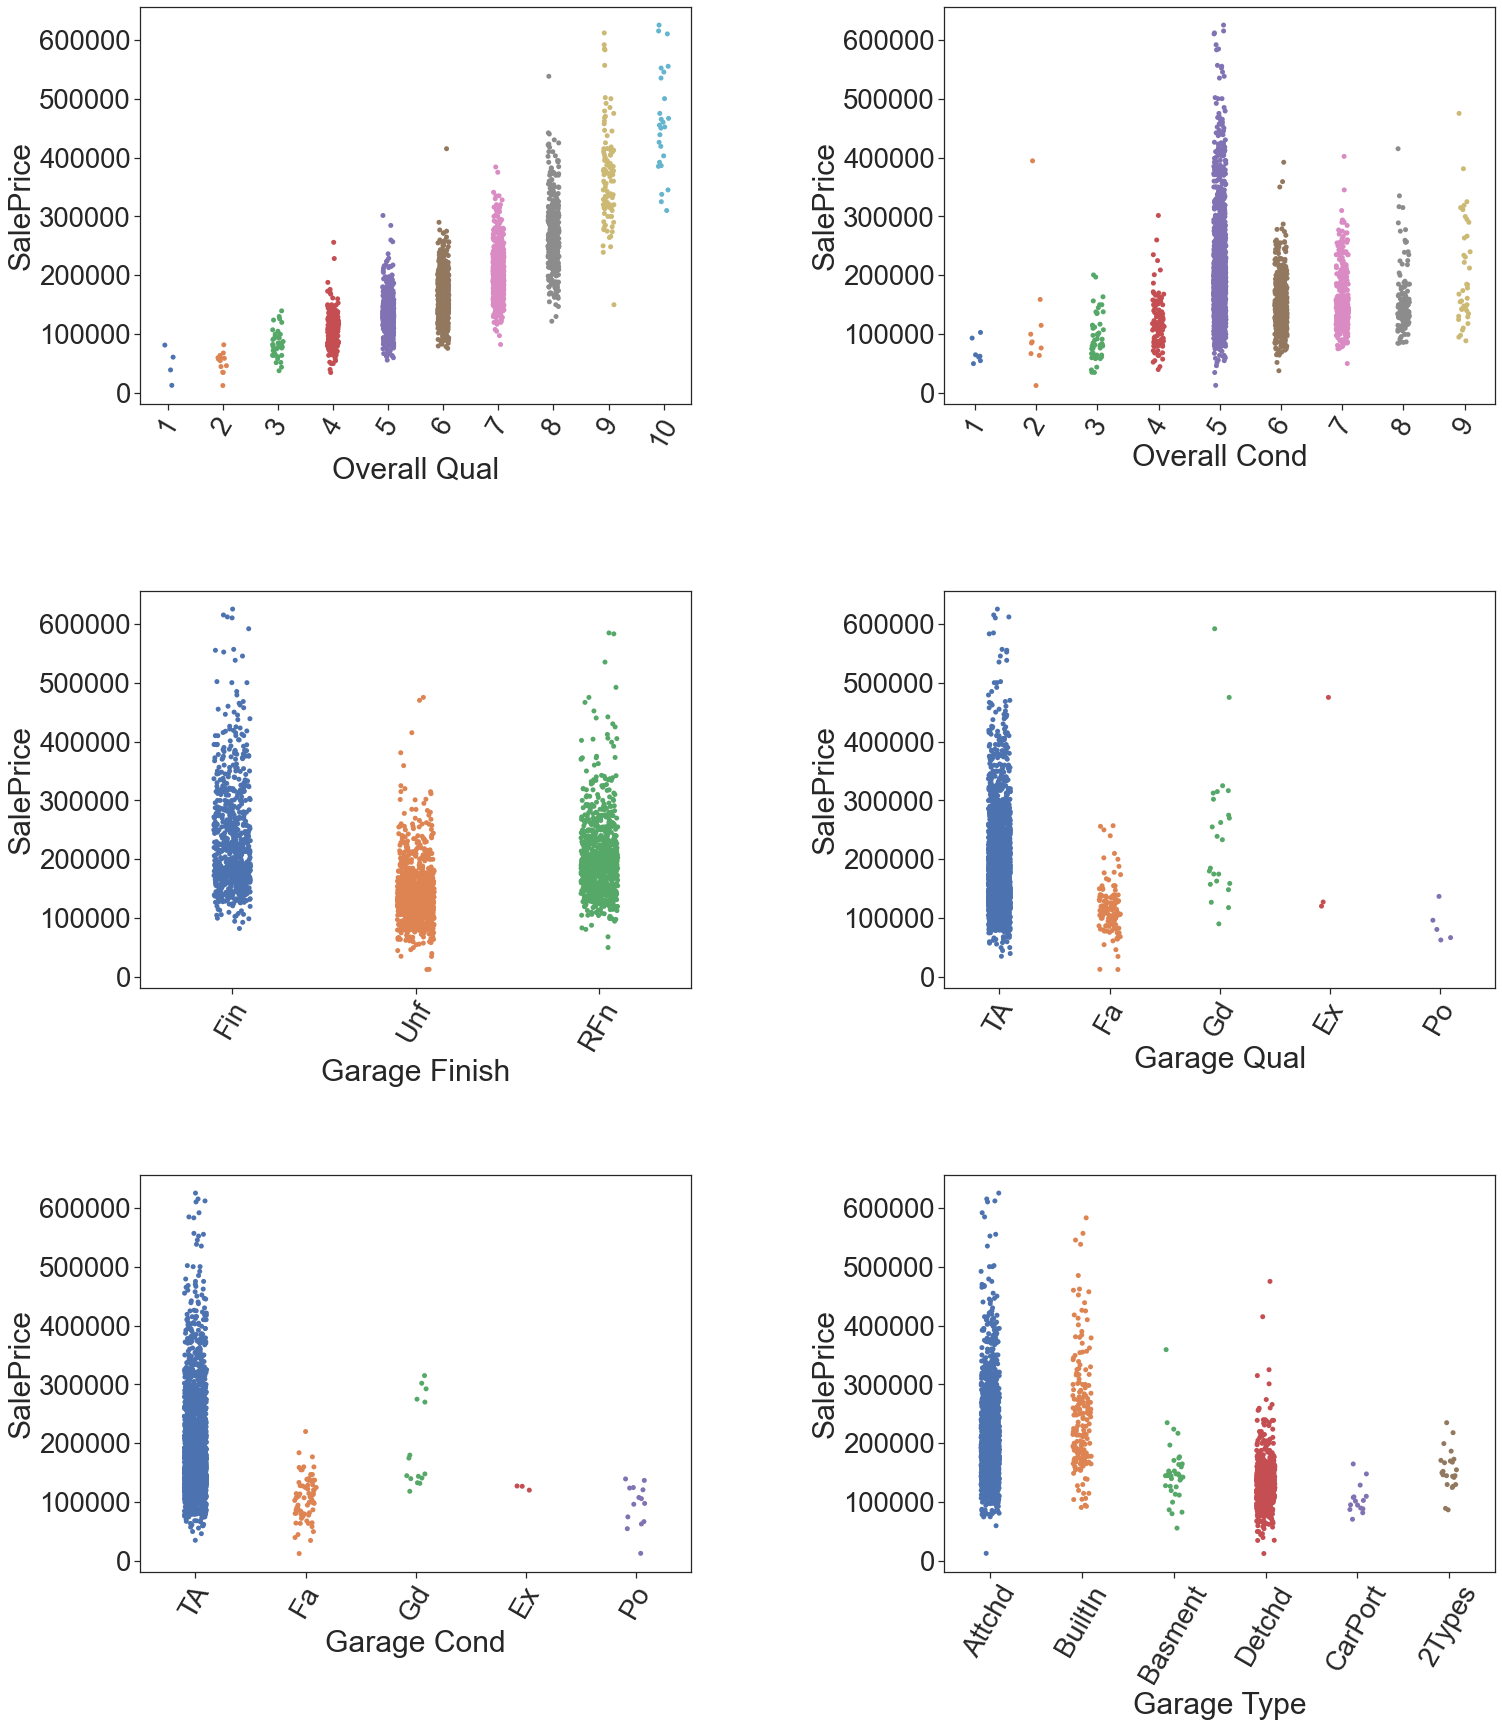

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.catplot(x = "Overall Qual", y = "SalePrice", data=df_housing, ax= ax[0,0])
sns.catplot(x = "Overall Cond", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Garage Finish", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Garage Qual", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.catplot(x = "Garage Cond", y = "SalePrice",  data=df_housing, ax=ax[2,0])
sns.catplot(x = "Garage Type", y = "SalePrice",  data=df_housing, ax=ax[2,1])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

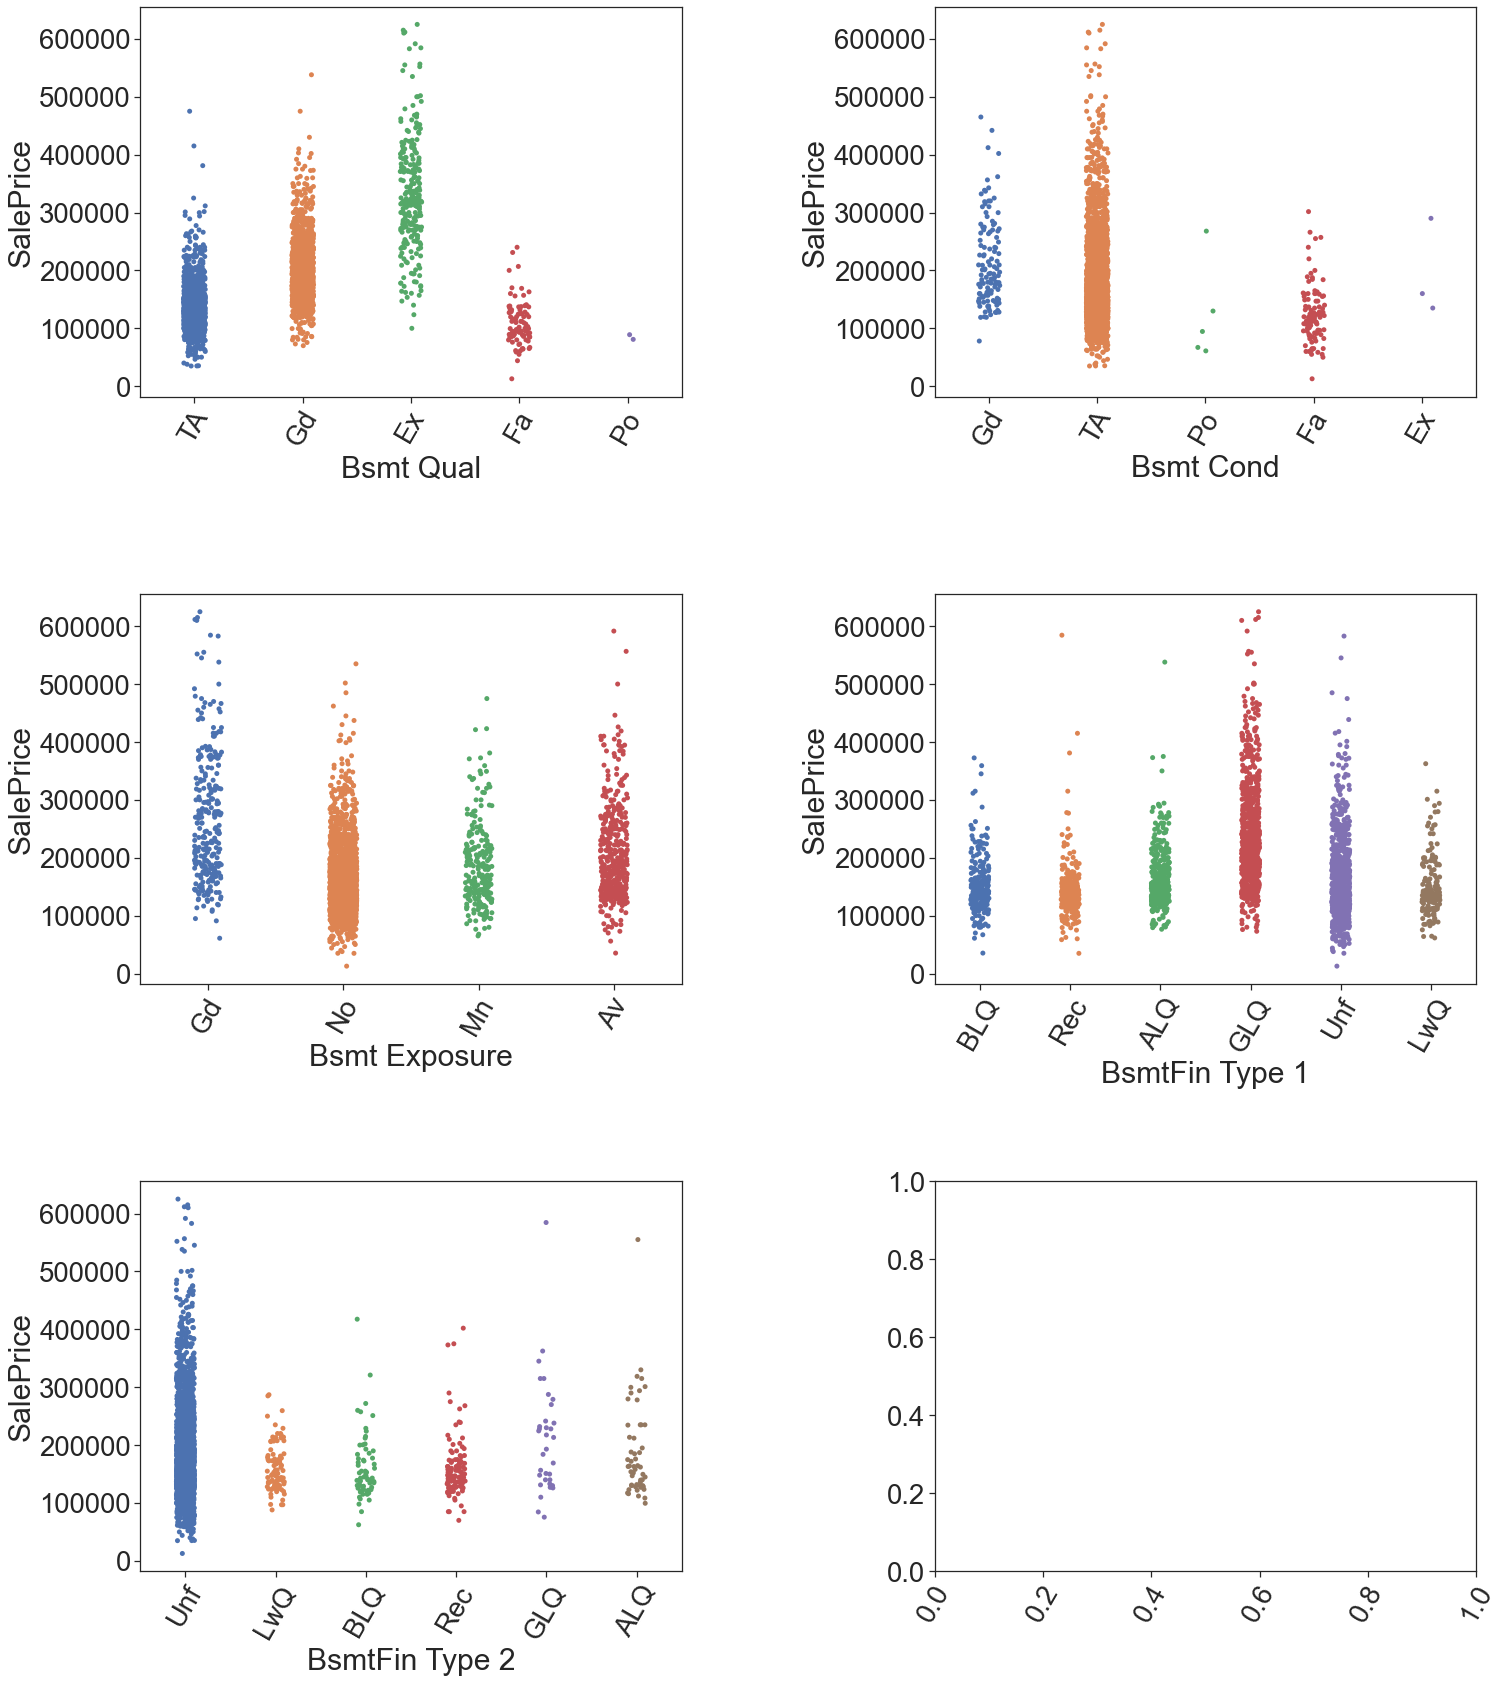

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(3,2, figsize=(24,26))
sns.catplot(x = "Bsmt Qual", y = "SalePrice", data=df_housing, ax= ax[0,0])
sns.catplot(x = "Bsmt Cond", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Bsmt Exposure", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "BsmtFin Type 1", y = "SalePrice",  data=df_housing, ax=ax[1,1])
sns.catplot(x = "BsmtFin Type 2", y = "SalePrice",  data=df_housing, ax=ax[2,0])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()

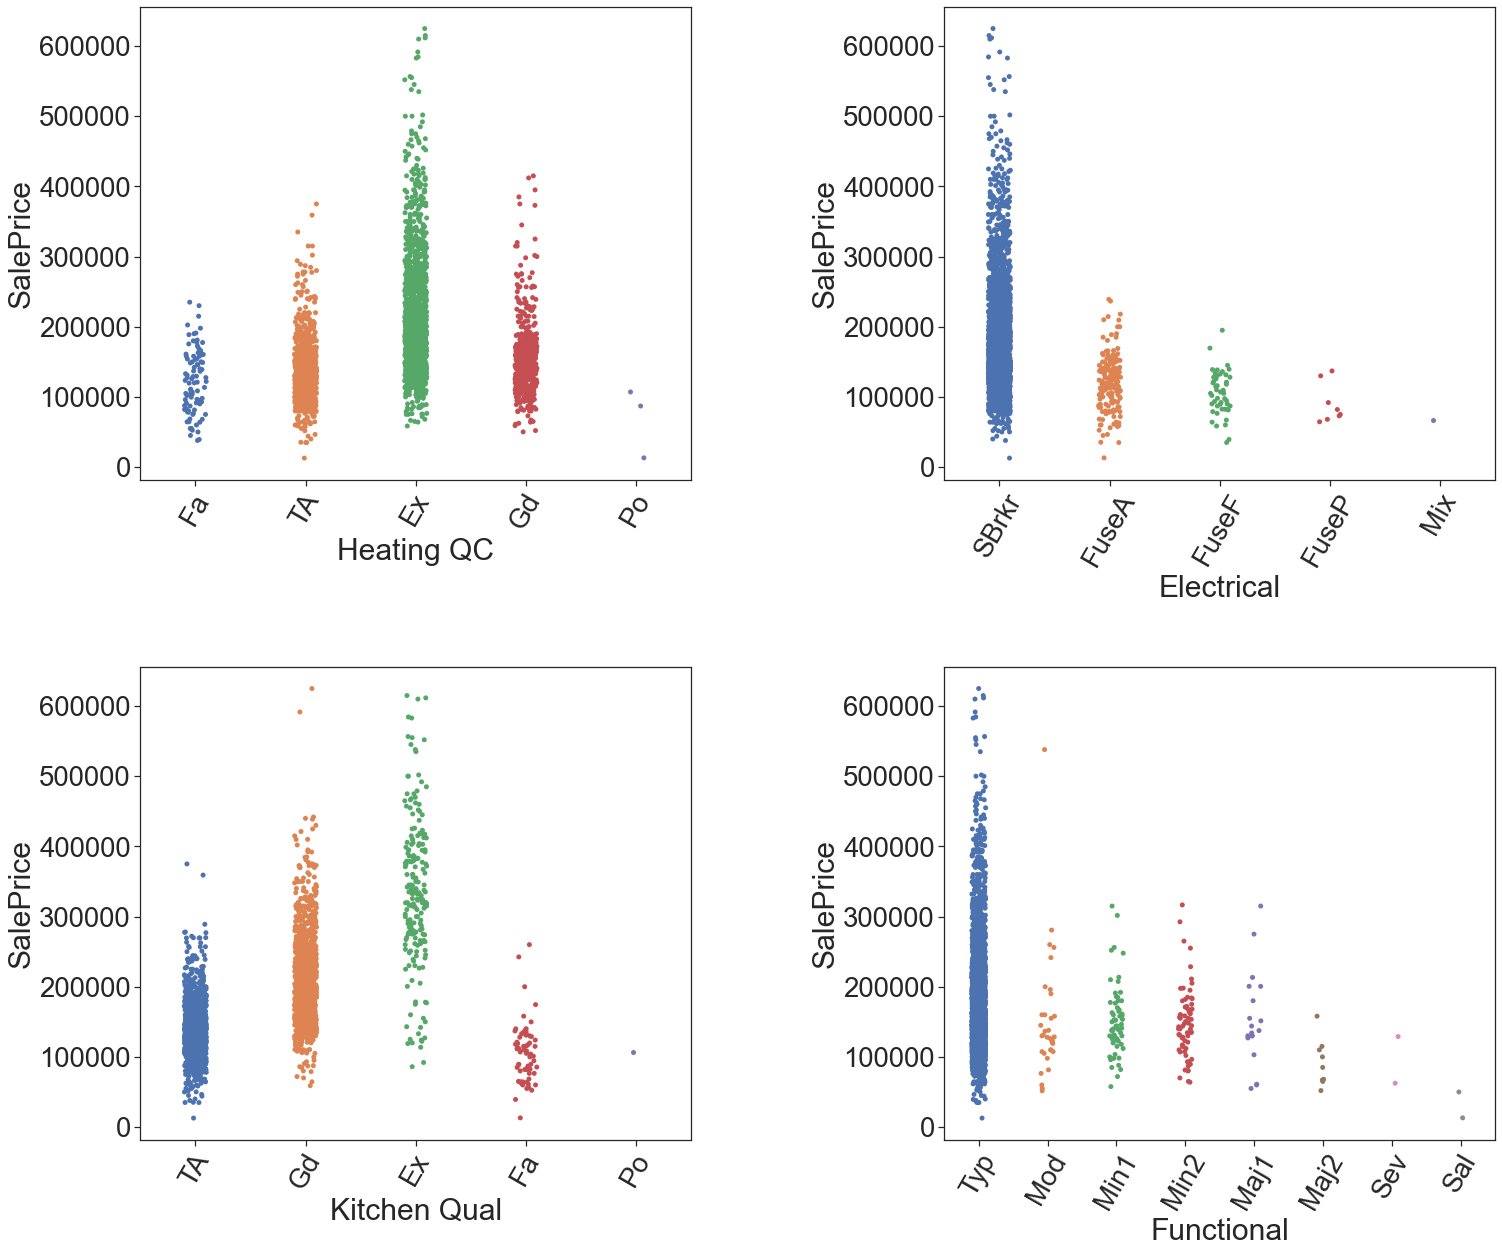

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(2,2, figsize=(24,20))
sns.catplot(x = "Heating QC", y = "SalePrice",  data=df_housing, ax=ax[0,0])
sns.catplot(x = "Electrical", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Kitchen Qual", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Functional", y = "SalePrice",  data=df_housing, ax=ax[1,1])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()


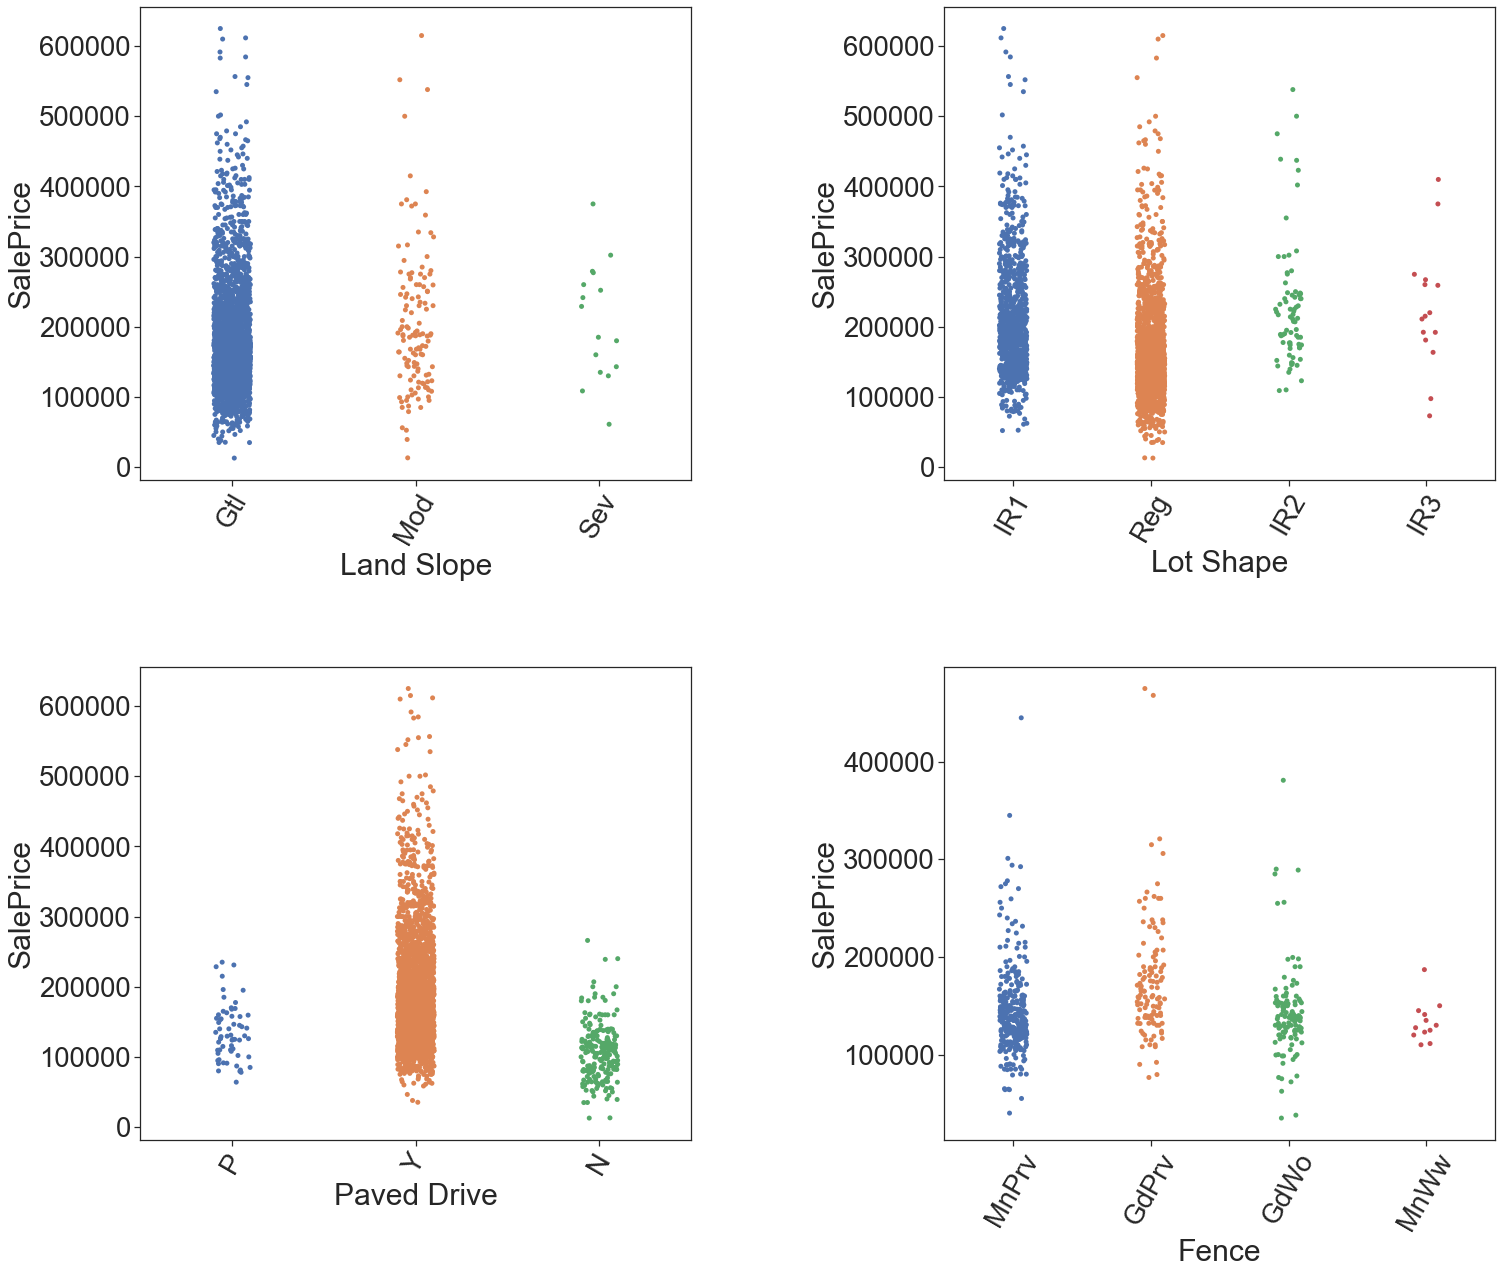

In [ ]:
sns.set(style="ticks",font_scale =2.5)
fig, ax = plt.subplots(2,2, figsize=(24,20))
sns.catplot(x = "Land Slope", y = "SalePrice",  data=df_housing, ax=ax[0,0])
sns.catplot(x = "Lot Shape", y = "SalePrice",  data=df_housing, ax=ax[0,1])
sns.catplot(x = "Paved Drive", y = "SalePrice",  data=df_housing, ax=ax[1,0])
sns.catplot(x = "Fence", y = "SalePrice",  data=df_housing, ax=ax[1,1])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

plt.tight_layout()
plt.tight_layout(pad=4.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.show()


In [ ]:
df_housing.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
df_housing.columns
list1 = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond']
list2 =['Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
list3 = ['Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt']
list4 = ['Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']

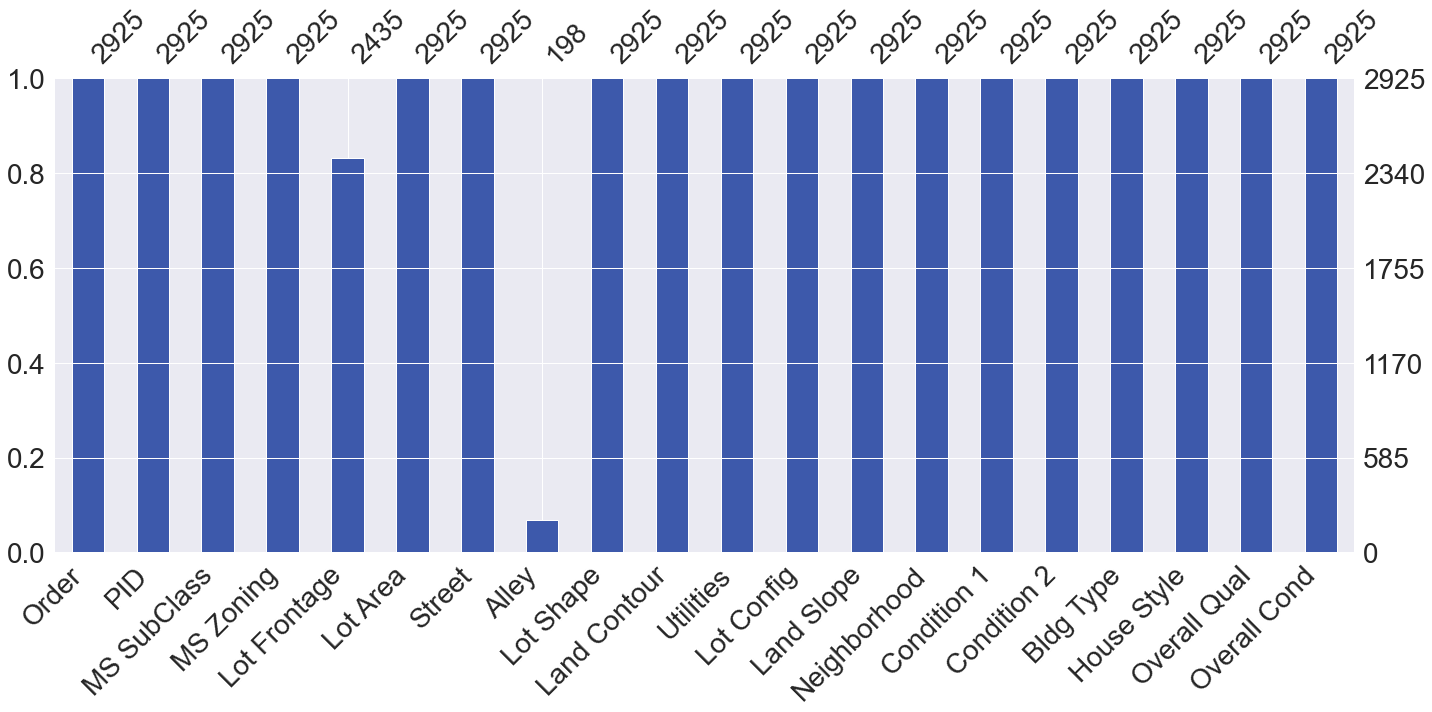

In [ ]:
%matplotlib inline
msno.bar(df_housing[list1],color='#3D59AB',labels=True,figsize = (20,10), fontsize = 28)
#plt.xlabel('Variable')
plt.tight_layout()
plt.show()

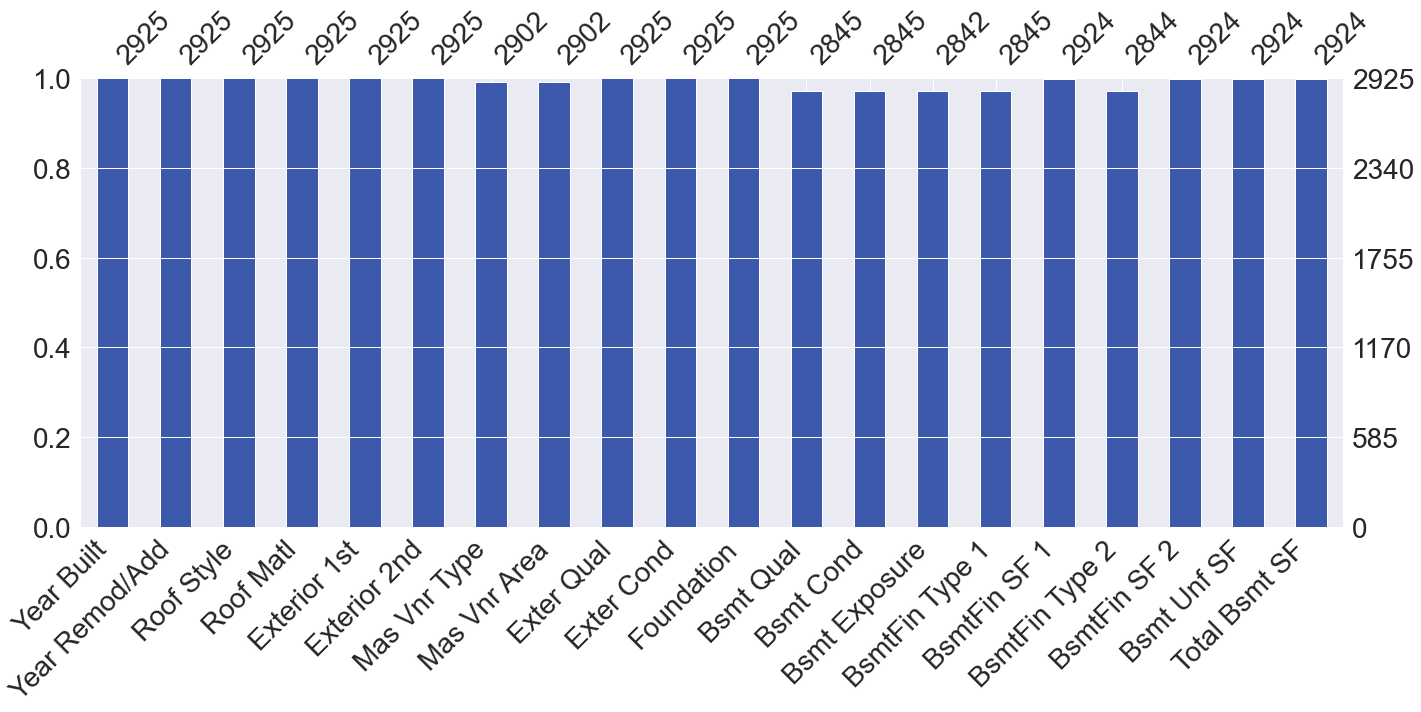

In [ ]:
%matplotlib inline
msno.bar(df_housing[list2],color='#3D59AB',labels=True,figsize = (20,10), fontsize = 28)
plt.tight_layout()
plt.show()

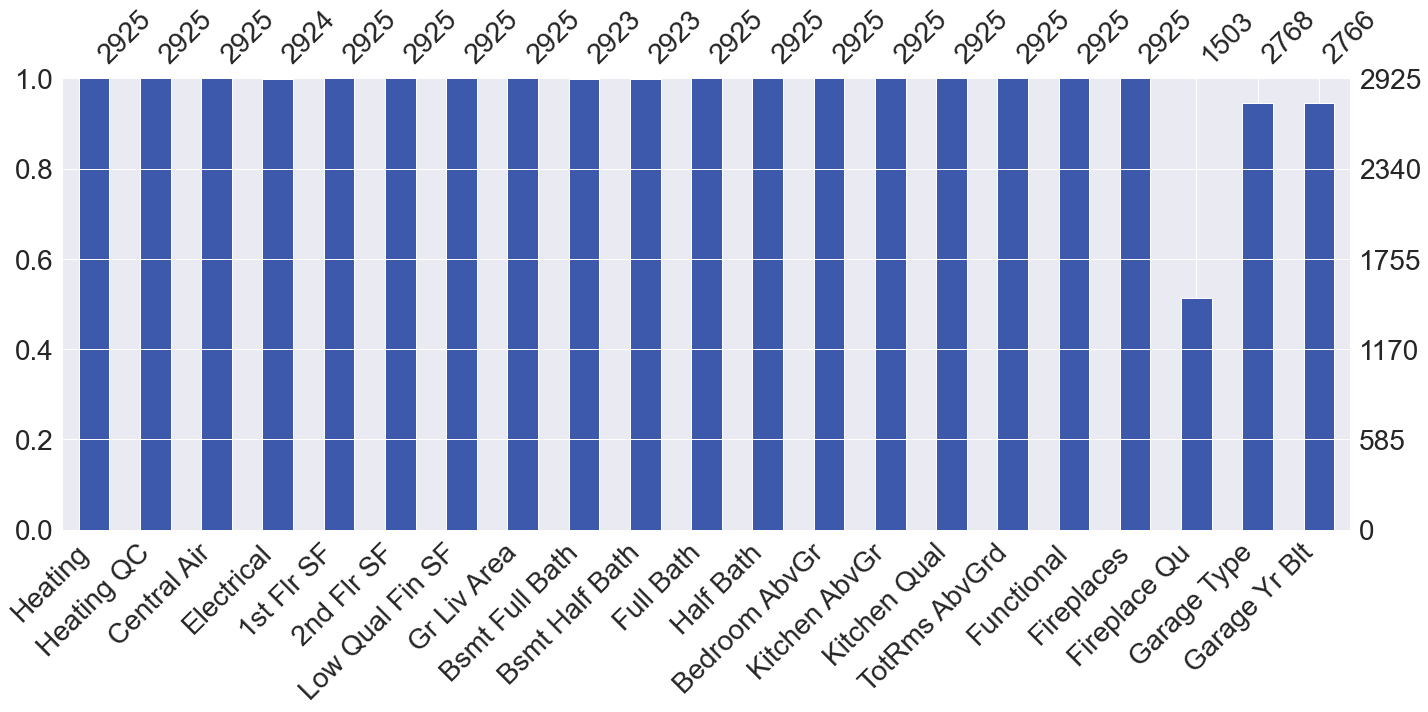

In [ ]:
%matplotlib inline
msno.bar(df_housing[list3],color='#3D59AB',labels=True,figsize = (20,10), fontsize = 28)
plt.tight_layout()
plt.show()

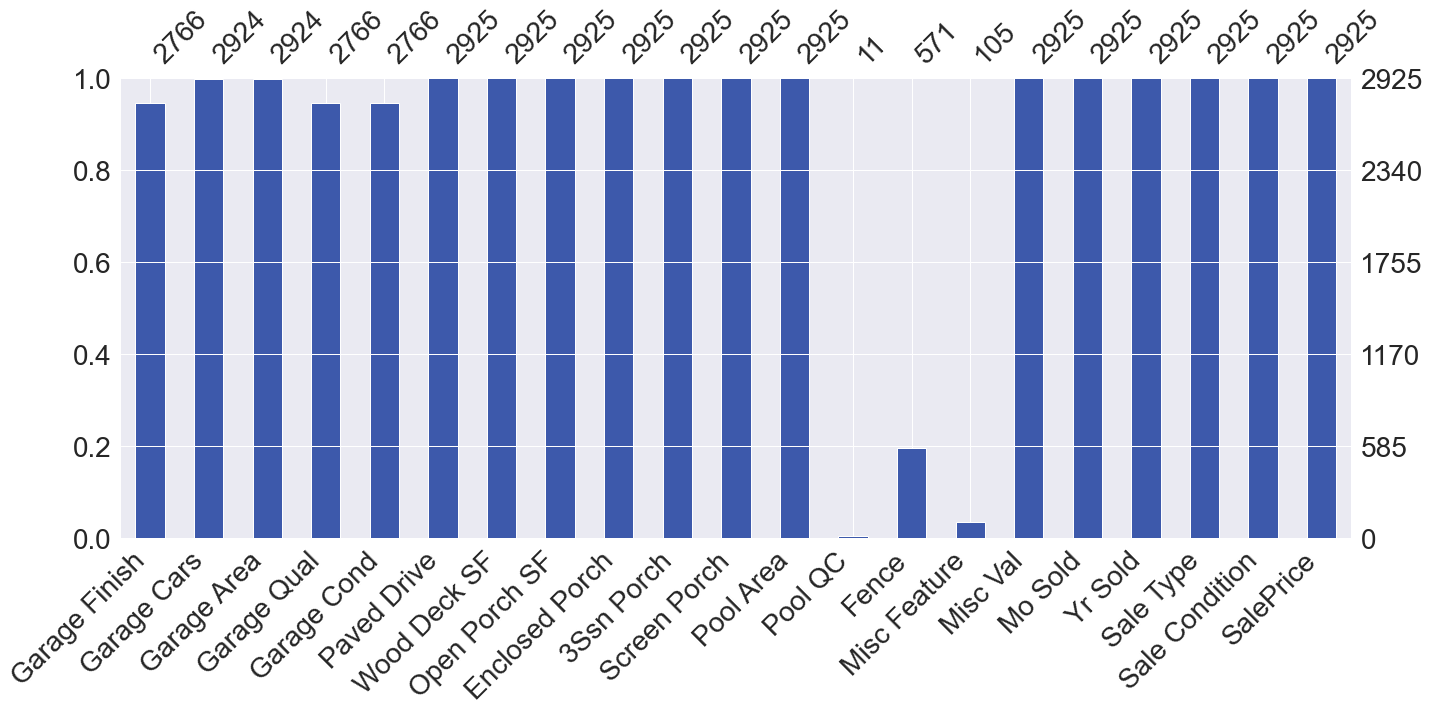

In [ ]:
%matplotlib inline
msno.bar(df_housing[list4],color='#3D59AB',labels=True,figsize = (20,10), fontsize = 28)
plt.tight_layout()
plt.show()

In [5]:
df_housing.isnull().sum().sort_values(ascending=False)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Fireplace Qu      1422
                  ... 
1st Flr SF           0
Central Air          0
Heating QC           0
Sale Condition       0
Order                0
Length: 82, dtype: int64

Drop columns with so many missing values

In [6]:
df_housing.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1, inplace=True)

Fill null values

In [7]:
df_housing['Bsmt Unf SF'].fillna(0.0, inplace=True)
df_housing['BsmtFin SF 1'].fillna(0.0, inplace=True)
df_housing['BsmtFin SF 2'].fillna(0.0, inplace=True)
df_housing['Garage Area'].fillna(0.0, inplace=True)
df_housing['Garage Qual'].fillna('None', inplace=True)
df_housing['Garage Cond'].fillna('None', inplace=True)
df_housing['Garage Type'].fillna('None', inplace=True)
df_housing['Garage Finish'].fillna('None', inplace=True)
df_housing['Garage Cars'].fillna(0, inplace=True)
df_housing['Bsmt Exposure'].fillna('None', inplace=True)
df_housing['BsmtFin Type 1'].fillna('None', inplace=True)
df_housing['BsmtFin Type 2'].fillna('None', inplace=True)
df_housing['Fireplace Qu'].fillna('None', inplace=True)
df_housing['Bsmt Cond'].fillna('None', inplace=True)
df_housing['Bsmt Qual'].fillna('None', inplace=True)
df_housing['Mas Vnr Type'].fillna('None', inplace=True)
df_housing['Mas Vnr Area'].fillna(0.0, inplace=True)
df_housing['Bsmt Full Bath'].fillna(0.0, inplace=True)
df_housing['Bsmt Half Bath'].fillna(0.0, inplace=True)
df_housing['Total Bsmt SF'].fillna(0.0, inplace=True)
df_housing['Electrical'].fillna(df_housing['Electrical'].mode()[0], inplace=True)

In [8]:
df_housing['Garage Yr Blt'][(df_housing['Garage Yr Blt'].isna()) & (df_housing['Garage Area'] == 360.0)] = df_housing['Year Built'][(df_housing['Garage Yr Blt'].isna()) & (df_housing['Garage Area'] == 360.0)].values
df_housing['Garage Yr Blt'].fillna(0, inplace=True)

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_housing.isnull().sum().sort_values(ascending=False)

Lot Frontage     490
SalePrice          0
Exter Cond         0
Roof Style         0
Roof Matl          0
                ... 
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Order              0
Length: 78, dtype: int64

Comparing Garage Yr Blt with Year Built and Year Remod/Add

In [ ]:
len(df_housing[(df_housing['Garage Yr Blt'] - df_housing['Year Built'])==0])

2223

In [ ]:
len(df_housing[(df_housing['Garage Yr Blt'] - df_housing['Year Remod/Add'])==0])

1477

In [ ]:
df_housing['Garage Yr Blt'].replace(2207, df_housing['Year Built'], inplace=True)

In [ ]:
Neighborhood = np.unique(df_housing['Neighborhood'])
Bldg_Type = np.unique(df_housing['Bldg Type'])
for neigh in Neighborhood:
    print('Neighborhood',neigh)
    for bldg in Bldg_Type:
        x = df_housing['Lot Frontage'][(df_housing['Neighborhood']== neigh) & (df_housing['Bldg Type'] == bldg) & (df_housing['Lot Frontage'].notnull())].mean()
        print(bldg,': ',np.round(x))
    print('\n')

Replace missing Lot Frontage values with average value by Neigborhood and Building Type

In [11]:
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Blmngtn') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Blmngtn') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'BrkSide') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'BrkSide') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'ClearCr') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'ClearCr') & df_housing['Lot Frontage'].notnull()].mean() #There was no average value for Twnhs, all missing Lot Frontage values are replace with average lot frontage size of the neighborhood
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'CollgCr') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'CollgCr') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'CollgCr') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'CollgCr') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Crawfor') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Crawfor') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Crawfor') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Crawfor') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Edwards') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Edwards') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Edwards') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Edwards') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Gilbert') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Gilbert') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Greens') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Greens') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'IDOTRR') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'IDOTRR') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Landmrk') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].isna()] = 22 #Actual frontage was gotten from Beacon
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'MeadowV') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'MeadowV') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'MeadowV') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'MeadowV') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & (df_housing['Bldg Type'] == '2fmCon') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Mitchel') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NAmes') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NAmes') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NAmes') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NAmes') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NPkVill') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NPkVill') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NWAmes') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NWAmes') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NWAmes') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NWAmes') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NoRidge') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NoRidge') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NridgHt') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NridgHt') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NridgHt') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'NridgHt') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'OldTown') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'OldTown') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SWISU') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SWISU') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Sawyer') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Sawyer') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Sawyer') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Sawyer') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SawyerW') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SawyerW') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SawyerW') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'SawyerW') & (df_housing['Bldg Type'] == 'Duplex') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == 'Twnhs') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Somerst') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'StoneBr') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'StoneBr') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'StoneBr') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'StoneBr') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Timber')  & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Timber')  & df_housing['Lot Frontage'].notnull()].mean()
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'GrnHill') & (df_housing['Bldg Type'] == 'TwnhsE') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Timber')  & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean() #Average lot frontage size for the closest neighborhood (Timber)+ TwnhsE was applied
df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Veenker') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].isna()] = df_housing['Lot Frontage'][(df_housing.Neighborhood == 'Veenker') & (df_housing['Bldg Type'] == '1Fam') & df_housing['Lot Frontage'].notnull()].mean()

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [12]:
df_housing.isnull().sum().sort_values(ascending=False)

SalePrice        0
Exter Cond       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
Kitchen AbvGr    0
Kitchen Qual     0
TotRms AbvGrd    0
Functional       0
Order            0
Length: 78, dtype: int64

# Methodology and Experiment

Encoding Categorical Value

In [13]:
Kitchen_Qual = {'Kitchen Qual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Heating_QC = {'Heating QC':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Exter_Qual = {'Exter Qual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Exter_Cond = {'Exter Cond':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Lot_Shape = {'Lot Shape':{'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}}
Utilities = {'Utilities':{'ELO':1,'NoSeWa':2, 'NoSewr':3, 'AllPub':4}}
Land_Slope = {'Land Slope':{'Sev':1,'Mod':2, 'Gtl':3}}
Bsmt_Qual = {'Bsmt Qual':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Bsmt_Cond = {'Bsmt Cond':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Bsmt_Exposure = {'Bsmt Exposure':{'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}}
BsmtFin_Type1 = {'BsmtFin Type 1':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}}
BsmtFin_Type2 = {'BsmtFin Type 2':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}}
Electrical = {'Electrical':{'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}}
Functional = {'Functional':{'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}}
Fireplace_Qu = {'Fireplace Qu':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Garage_Finish = {'Garage Finish':{'None':0, 'Unf':1, 'RFn':2, 'Fin':3}}
Garage_Qual = {'Garage Qual':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Garage_Cond = {'Garage Cond':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}}
Paved_Drive = {'Paved Drive':{'N':1, 'P':2, 'Y':3}}

In [14]:
df_housing1 = df_housing.copy() #make a copy of the data

In [15]:
df_housing1.replace(Kitchen_Qual, inplace=True)
df_housing1.replace(Heating_QC, inplace=True)
df_housing1.replace(Exter_Qual, inplace=True)
df_housing1.replace(Exter_Cond, inplace=True)
df_housing1.replace(Lot_Shape, inplace=True)
df_housing1.replace(Utilities, inplace=True)
df_housing1.replace(Bsmt_Qual, inplace=True)
df_housing1.replace(Bsmt_Cond, inplace=True)
df_housing1.replace(Bsmt_Exposure, inplace=True)
df_housing1.replace(BsmtFin_Type1, inplace=True)
df_housing1.replace(BsmtFin_Type2, inplace=True)
df_housing1.replace(Electrical, inplace=True)
df_housing1.replace(Functional, inplace=True)
df_housing1.replace(Fireplace_Qu, inplace=True)
df_housing1.replace(Garage_Finish, inplace=True)
df_housing1.replace(Garage_Qual, inplace=True)
df_housing1.replace(Garage_Cond, inplace=True)
df_housing1.replace(Paved_Drive, inplace=True)
df_housing1.replace(Land_Slope, inplace=True)

In [16]:
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Neighborhood"],prefix='Neigh')],axis=1)
df_housing1.drop(['Neighborhood'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["MS Zoning"],prefix='MsZon')],axis=1)
df_housing1.drop(['MS Zoning'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Street"],prefix='Street')],axis=1)
df_housing1.drop(['Street'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Land Contour"],prefix='Contour')],axis=1)
df_housing1.drop(['Land Contour'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Lot Config"],prefix='LotConfig')],axis=1)
df_housing1.drop(['Lot Config'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Condition 1"],prefix='Cond1')],axis=1)
df_housing1.drop(['Condition 1'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Condition 2"],prefix='Cond2')],axis=1)
df_housing1.drop(['Condition 2'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Bldg Type"],prefix='Bldg')],axis=1)
df_housing1.drop(['Bldg Type'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["House Style"],prefix='HStyle')],axis=1)
df_housing1.drop(['House Style'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Roof Style"],prefix='RStyle')],axis=1)
df_housing1.drop(['Roof Style'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Roof Matl"],prefix='RMatl')],axis=1)
df_housing1.drop(['Roof Matl'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Exterior 1st"],prefix='Ext1')],axis=1)
df_housing1.drop(['Exterior 1st'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Exterior 2nd"],prefix='Ext2')],axis=1)
df_housing1.drop(['Exterior 2nd'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Mas Vnr Type"],prefix='MVnr')],axis=1)
df_housing1.drop(['Mas Vnr Type'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Foundation"],prefix='Found')],axis=1)
df_housing1.drop(['Foundation'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Heating"],prefix='Heat')],axis=1)
df_housing1.drop(['Heating'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Central Air"],prefix='Air')],axis=1)
df_housing1.drop(['Central Air'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Garage Type"],prefix='Garage')],axis=1)
df_housing1.drop(['Garage Type'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Sale Type"],prefix='Sale')],axis=1)
df_housing1.drop(['Sale Type'],axis=1, inplace=True)
df_housing1 = pd.concat([df_housing1,pd.get_dummies(df_housing1["Sale Condition"],prefix='SCond')],axis=1)
df_housing1.drop(['Sale Condition'],axis=1, inplace=True)

In [17]:
df_housing1

Order        PID  MS SubClass  Lot Frontage  Lot Area  Lot Shape  \
0         1  526301100           20        141.00     31770          3   
1         2  526350040           20         80.00     11622          4   
2         3  526351010           20         81.00     14267          3   
3         4  526353030           20         93.00     11160          4   
4         5  527105010           60         74.00     13830          3   
...     ...        ...          ...           ...       ...        ...   
2925   2926  923275080           80         37.00      7937          3   
2926   2927  923276100           20         77.25      8885          3   
2927   2928  923400125           85         62.00     10441          4   
2928   2929  924100070           20         77.00     10010          4   
2929   2930  924151050           60         74.00      9627          4   

      Utilities  Land Slope  Overall Qual  Overall Cond  ...  Sale_New  \
0             4           3             6             5  ...         0   
1             4           3             5             6  ...         0   
2             4           3             6             6  ...         0   
3             4           3             7             5  ...         0   
4             4           3             5             5  ...         0   
...         ...         ...           ...           ...  ...       ...   
2925          4           3             6             6  ...         0   
2926          4           2             5             5  ...         0   
2927          4           3             5             5  ...         0   
2928          4           2             5             5  ...         0   
2929          4           2             7             5  ...         0   

      Sale_Oth  Sale_VWD  Sale_WD   SCond_Abnorml  SCond_AdjLand  \
0            0         0         1              0              0   
1            0         0         1              0              0   
2            0         0         1              0              0   
3            0         0         1              0              0   
4            0         0         1              0              0   
...        ...       ...       ...            ...            ...   
2925         0         0         1              0              0   
2926         0         0         1              0              0   
2927         0         0         1              0              0   
2928         0         0         1              0              0   
2929         0         0         1              0              0   

      SCond_Alloca  SCond_Family  SCond_Normal  SCond_Partial  
0                0             0             1              0  
1                0             0             1              0  
2                0             0             1              0  
3                0             0             1              0  
4                0             0             1              0  
...            ...           ...           ...            ...  
2925             0             0             1              0  
2926             0             0             1              0  
2927             0             0             1              0  
2928             0             0             1              0  
2929             0             0             1              0  

[2925 rows x 222 columns]

In [18]:
df_housing1.info()
df_housing1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 222 entries, Order to SCond_Partial
dtypes: float64(11), int64(47), uint8(164)
memory usage: 1.8 MB


(2925, 222)

Drop columns - Order, PID also 1st Flr SF, Garage Cars,Garage Yr Blt are they are correlated with other fields

In [19]:
df_housing1.drop(['Order','PID'], axis=1, inplace=True)
df_housing1.drop(['1st Flr SF', 'Garage Cars','Garage Yr Blt'], axis=1, inplace= True)

In [20]:
df_housing2 = df_housing1.copy() #make a copy of the data

Assign independent variables to X and dependent variable to Y

In [21]:
Y = df_housing1['SalePrice'].values
df_housing1.drop(['SalePrice'], axis=1, inplace=True)
X = df_housing1.values

Split Data into train and test set

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [24]:
print("Sample Size of Training Set:", len(X_train))
print("Sample Size of Test Set:", len(X_test))

Sample Size of Training Set: 2340
Sample Size of Test Set: 585


Automatic Outlier Detection

In [25]:
iso_train = IsolationForest(contamination=0.1)
yhat = iso_train.fit_predict(X_train)
ind = yhat != -1
X_train, Y_train = X_train[ind, :], Y_train[ind]

Data Normalization for Input variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
X_train.shape

(2106, 216)

Define RMSE and R-Squared Method

In [28]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Deep Neural Network Models

Model 1

In [29]:
model1 = Sequential()
model1.add(Dense(output_dim = 216, kernel_initializer ='he_uniform', activation = 'relu', input_dim = 216)) 
model1.add(Dropout(0.1))
model1.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
model1.add(Dropout(0.1))
model1.add(Dense(output_dim = 1))
model1.summary()
model1.compile(loss= root_mean_squared_error, optimizer = 'adamax', metrics=[r_squared])
model1_history = model1.fit(X_train,Y_train,validation_split=0.20, batch_size = 20,  epochs = 500)

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  after removing the cwd from sys.path.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 216)               46872     
_________________________________________________________________
dropout_1 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               21700     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 68,673
Trainable params: 68,673
Non-trainable params: 0
_________________________________________________________________
Train on 1684 samples, validate on 422 samples
Epoch 1/500
1684/1684 [==============================] - 1s 327us/ste

Training/validation plot

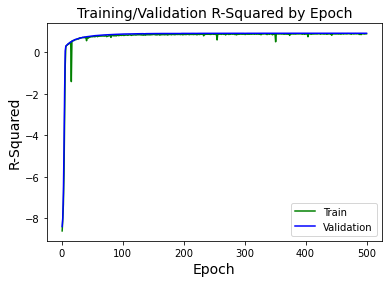

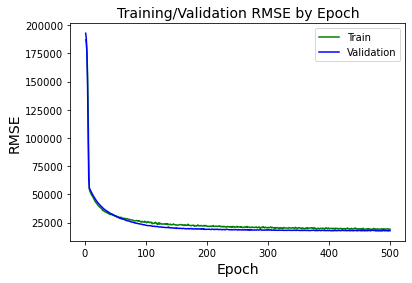

In [30]:
f, ax = plt.subplots()
ax.plot([None] + model1_history.history['r_squared'], 'g')
ax.plot([None] + model1_history.history['val_r_squared'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation R-Squared by Epoch',fontsize=14) 
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('R-Squared', fontsize=14)

f, ax = plt.subplots()
ax.plot([None] + model1_history.history['loss'], 'g')
ax.plot([None] + model1_history.history['val_loss'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation RMSE by Epoch',fontsize=14)
ax.set_xlabel('Epoch',fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
plt.show()

Training result for Model 1

In [31]:
train_rmse_nn1, train_rscore_nn1 = model1.evaluate(X_train,Y_train)
print("Train Root Mean Square Error:", np.round(train_rmse_nn1,3))
print("Train R-square:",np.round(train_rscore_nn1,2))

2106/2106 [==============================] - 0s 42us/step
Train Root Mean Square Error: 16605.069
Train R-square: 0.93


Test result for Model1

585/585 [==============================] - 0s 51us/step
Root Mean Square Error: 21534.796
R square: 0.93


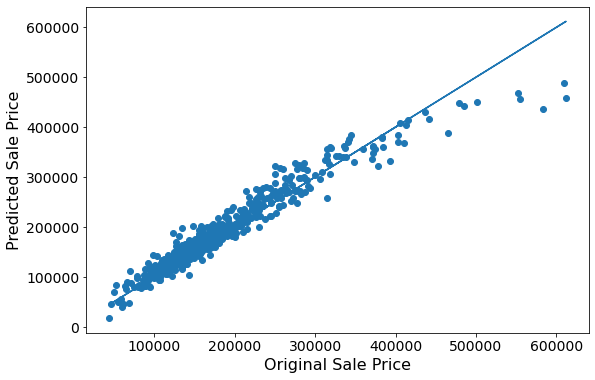

In [32]:
plt.figure(figsize=(9,6))

plt.plot(Y_test,Y_test)
y_pred = model1.predict(X_test)
test_rmse_nn1, test_rscore_nn1 = model1.evaluate(X_test,Y_test)

print("Root Mean Square Error:", np.round(test_rmse_nn1,3))
print("R square:",np.round(test_rscore_nn1,2))

plt.scatter(Y_test,y_pred)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price", fontsize =16)

plt.show()

Model 2

In [35]:
model2 = Sequential()
model2.add(Dense(output_dim = 216, kernel_initializer ='he_uniform', activation = 'relu', input_dim = 216)) 
model2.add(Dropout(0.1))
model2.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
model2.add(Dropout(0.1))
model2.add(Dense(output_dim = 50, kernel_initializer ='he_uniform', activation = 'relu')) 
model2.add(Dense(output_dim = 1))
model2.summary()
model2.compile(loss= root_mean_squared_error, optimizer = 'adamax', metrics=[r_squared])
model2_history = model2.fit(X_train,Y_train,validation_split=0.20, batch_size = 20,  epochs = 500)

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  after removing the cwd from sys.path.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 216)               46872     
_________________________________________________________________
dropout_7 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               21700     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 73,673
Trainable params: 73,673
Non-trainable params: 0
__________________________________________________

Training/Validation Plot

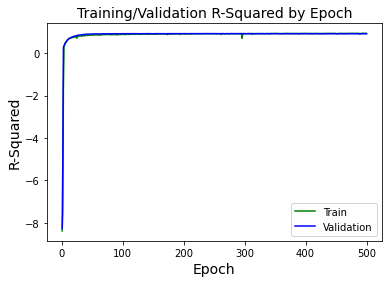

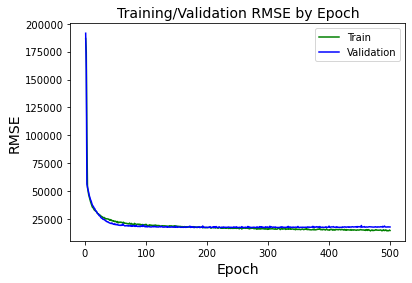

In [36]:
f, ax = plt.subplots()
ax.plot([None] + model2_history.history['r_squared'], 'g')
ax.plot([None] + model2_history.history['val_r_squared'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation R-Squared by Epoch', fontsize = 14) 
ax.set_xlabel('Epoch', fontsize = 14)
ax.set_ylabel('R-Squared', fontsize = 14)

f, ax = plt.subplots()
ax.plot([None] + model2_history.history['loss'], 'g')
ax.plot([None] + model2_history.history['val_loss'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation RMSE by Epoch', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('RMSE', fontsize =14)
plt.show()

Training Result for Model 2

In [37]:
train_rmse_nn2, train_rscore_nn2 = model2.evaluate(X_train,Y_train)
print("Train Root Mean Square Error:", np.round(train_rmse_nn2,3))
print("Train R-square:",np.round(train_rscore_nn2,2))

2106/2106 [==============================] - 0s 37us/step
Train Root Mean Square Error: 13206.463
Train R-square: 0.96


Test Result for Model 2

585/585 [==============================] - 0s 41us/step
Root Mean Square Error: 19409.0
R square: 0.94


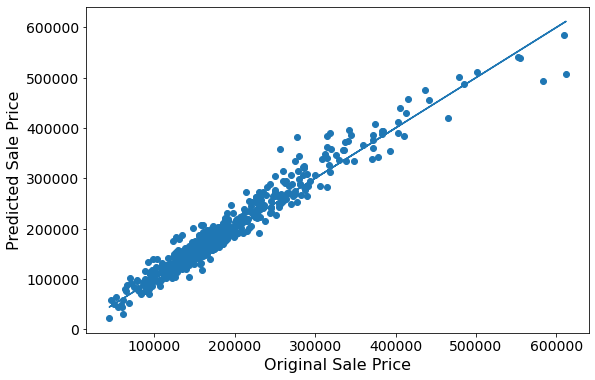

In [38]:
plt.figure(figsize=(9,6))
y_pred = model2.predict(X_test)
mse_nn, rscore_nn = model2.evaluate(X_test,Y_test)
plt.plot(Y_test,Y_test)
print("Root Mean Square Error:", np.round(mse_nn))
print("R square:",np.round(rscore_nn,2))

plt.scatter(Y_test,y_pred)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14 )
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price", fontsize =16)

plt.show()

Model 3

In [39]:
model3 = Sequential()
model3.add(Dense(output_dim = 216, kernel_initializer ='he_uniform', activation = 'relu', input_dim = 216)) 
model3.add(Dropout(0.1))
model3.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
model3.add(Dropout(0.1))
model3.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
model3.add(Dropout(0.1))
model3.add(Dense(output_dim = 50, kernel_initializer ='he_uniform', activation = 'relu')) 
model3.add(Dense(output_dim = 1))
model3.summary()
model3.compile(loss= root_mean_squared_error, optimizer = 'adamax', metrics=[r_squared])
model3_history = model3.fit(X_train,Y_train,validation_split=0.20, batch_size = 20,  epochs = 500)

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  after removing the cwd from sys.path.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipyker

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 216)               46872     
_________________________________________________________________
dropout_9 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               21700     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)               

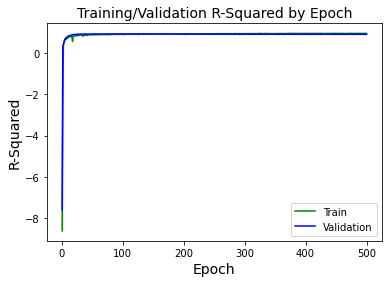

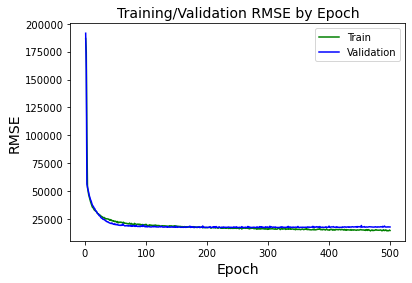

In [43]:
f, ax = plt.subplots()
ax.plot([None] + model3_history.history['r_squared'], 'g')
ax.plot([None] + model3_history.history['val_r_squared'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation R-Squared by Epoch', fontsize=14) 
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('R-Squared', fontsize=14)

f, ax = plt.subplots()
ax.plot([None] + model2_history.history['loss'], 'g')
ax.plot([None] + model2_history.history['val_loss'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation RMSE by Epoch', fontsize=14)
ax.set_xlabel('Epoch',fontsize = 14)
ax.set_ylabel('RMSE', fontsize = 14)
plt.show()

Training Result for Model 3

In [41]:
train_rmse_nn3, train_rscore_nn3 = model3.evaluate(X_train,Y_train)
print("Train Root Mean Square Error:", np.round(train_rmse_nn3,3))
print("Train R-square:",np.round(train_rscore_nn3,2))

2106/2106 [==============================] - 0s 31us/step
Train Root Mean Square Error: 9972.093
Train R-square: 0.97


585/585 [==============================] - 0s 43us/step
Root Mean Square Error: 22312.363
R square: 0.92


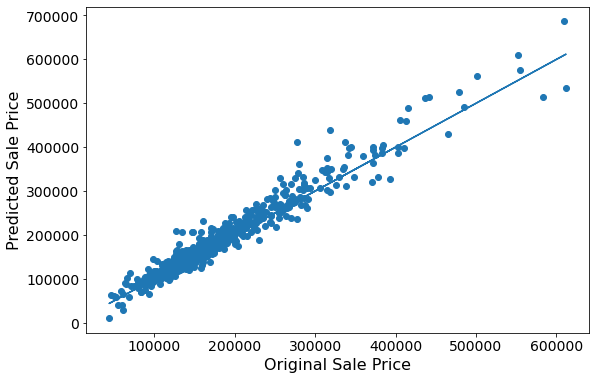

In [44]:
plt.figure(figsize=(9,6))
y_pred = model3.predict(X_test)
test_rmse_nn3, test_rscore_nn3 = model3.evaluate(X_test,Y_test)
plt.plot(Y_test,Y_test)
print("Root Mean Square Error:", np.round(test_rmse_nn3,3))
print("R square:",np.round(test_rscore_nn3,2))

plt.scatter(Y_test,y_pred)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price", fontsize =16)
plt.show()

Cross Validation

In [45]:
kfold = KFold(n_splits = 10, shuffle=True)

XX = sc.fit_transform(X)

rsquared_per_fold = []
loss_per_fold = []
n = 1
for train, test in kfold.split(XX,Y):
    modelcv = Sequential()
    modelcv.add(Dense(output_dim = 216, kernel_initializer ='he_uniform', activation = 'relu', input_dim = 216)) 
    modelcv.add(Dropout(0.1))
    modelcv.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
    modelcv.add(Dropout(0.1))
    modelcv.add(Dense(output_dim = 50, kernel_initializer ='he_uniform', activation = 'relu')) 
    modelcv.add(Dense(output_dim = 1))
    
    modelcv.compile(loss= root_mean_squared_error, optimizer = 'adamax', metrics=[r_squared])
    # Fit data to model
    history = modelcv.fit(XX[train], Y[train], batch_size=20, epochs= 500, verbose=1)

    # Generate generalization metrics
    scores = modelcv.evaluate(XX[test], Y[test], verbose=0)
    print(f'Score for fold {n}: {modelcv.metrics_names[0]} of {scores[0]}; {modelcv.metrics_names[1]} of {scores[1]}')
    rsquared_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    # Increase fold number
    n = n + 1

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2632/2632 [==============================] - 1s 345us/step - loss: 192962.0868 - r_squared: -6.3611
Epoch 2/500
2632/2632 [==============================] - 0s 185us/step - loss: 113097.1729 - r_squared: -1.9434
Epoch 3/500
2632/2632 [==============================] - 1s 206us/step - loss: 60583.3238 - r_squared: 0.3322
Epoch 4/500
2632/2632 [==============================] - 1s 191us/step - loss: 55707.2775 - r_squared: 0.4431
Epoch 5/500
2632/2632 [==============================] - 1s 205us/step - loss: 51014.9809 - r_squared: 0.5268
Epoch 6/500
2632/2632 [==============================] - 0s 189us/step - loss: 47130.1729 - r_squared: 0.5889
Epoch 7/500
2632/2632 [==============================] - 1s 203us/step - loss: 42732.0966 - r_squared: 0.6595
Epoch 8/500
2632/2632 [==============================] - 0s 185us/step - loss: 40207.3976 - r_squared: 0.7049
Epoch 9/500
2632/2632 [==============================] - 0s 189us/step - loss: 38335.2666 - r_squared: 0.7230
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2632/2632 [==============================] - 1s 253us/step - loss: 192264.8274 - r_squared: -6.9234
Epoch 2/500
2632/2632 [==============================] - 0s 179us/step - loss: 119533.3778 - r_squared: -2.2860
Epoch 3/500
2632/2632 [==============================] - 1s 192us/step - loss: 60142.8927 - r_squared: 0.3432
Epoch 4/500
2632/2632 [==============================] - 1s 201us/step - loss: 55044.1830 - r_squared: 0.4322
Epoch 5/500
2632/2632 [==============================] - 0s 180us/step - loss: 50550.5416 - r_squared: 0.5198
Epoch 6/500
2632/2632 [==============================] - 1s 193us/step - loss: 46513.8939 - r_squared: 0.5930
Epoch 7/500
2632/2632 [==============================] - 0s 173us/step - loss: 42914.8786 - r_squared: 0.6556
Epoch 8/500
2632/2632 [==============================] - 1s 194us/step - loss: 40107.8172 - r_squared: 0.6973
Epoch 9/500
2632/2632 [==============================] - 0s 188us/step - loss: 37810.0229 - r_squared: 0.7164
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2632/2632 [==============================] - 1s 243us/step - loss: 190706.2500 - r_squared: -6.9705
Epoch 2/500
2632/2632 [==============================] - 1s 198us/step - loss: 113703.4035 - r_squared: -2.0172
Epoch 3/500
2632/2632 [==============================] - 1s 202us/step - loss: 59179.6609 - r_squared: 0.3338
Epoch 4/500
2632/2632 [==============================] - 1s 203us/step - loss: 54668.1649 - r_squared: 0.4275
Epoch 5/500
2632/2632 [==============================] - 0s 190us/step - loss: 50492.1378 - r_squared: 0.4993
Epoch 6/500
2632/2632 [==============================] - 1s 197us/step - loss: 46464.8936 - r_squared: 0.5901
Epoch 7/500
2632/2632 [==============================] - 0s 166us/step - loss: 43663.6336 - r_squared: 0.6355
Epoch 8/500
2632/2632 [==============================] - 0s 174us/step - loss: 40180.9231 - r_squared: 0.6847
Epoch 9/500
2632/2632 [==============================] - 0s 167us/step - loss: 38133.1164 - r_squared: 0.7173
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2632/2632 [==============================] - 1s 319us/step - loss: 194216.8487 - r_squared: -6.6598
Epoch 2/500
2632/2632 [==============================] - 1s 203us/step - loss: 123619.7678 - r_squared: -2.4406
Epoch 3/500
2632/2632 [==============================] - 1s 194us/step - loss: 61672.0327 - r_squared: 0.3171
Epoch 4/500
2632/2632 [==============================] - 1s 205us/step - loss: 57151.0527 - r_squared: 0.4262
Epoch 5/500
2632/2632 [==============================] - 0s 177us/step - loss: 51916.2169 - r_squared: 0.5173
Epoch 6/500
2632/2632 [==============================] - 1s 201us/step - loss: 47490.3515 - r_squared: 0.5857
Epoch 7/500
2632/2632 [==============================] - 0s 180us/step - loss: 44136.2224 - r_squared: 0.6351
Epoch 8/500
2632/2632 [==============================] - 1s 202us/step - loss: 41272.2677 - r_squared: 0.6858
Epoch 9/500
2632/2632 [==============================] - 0s 184us/step - loss: 39250.2181 - r_squared: 0.7062
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2632/2632 [==============================] - 1s 263us/step - loss: 191613.0368 - r_squared: -6.5458
Epoch 2/500
2632/2632 [==============================] - 1s 210us/step - loss: 107459.5658 - r_squared: -1.6377
Epoch 3/500
2632/2632 [==============================] - 1s 202us/step - loss: 60692.9723 - r_squared: 0.3425 0s - loss: 63634.4146 - r_squared
Epoch 4/500
2632/2632 [==============================] - 0s 176us/step - loss: 55448.4036 - r_squared: 0.4478
Epoch 5/500
2632/2632 [==============================] - 0s 143us/step - loss: 49945.4180 - r_squared: 0.5352
Epoch 6/500
2632/2632 [==============================] - 0s 150us/step - loss: 45513.0898 - r_squared: 0.6218
Epoch 7/500
2632/2632 [==============================] - 0s 145us/step - loss: 42183.6680 - r_squared: 0.6672
Epoch 8/500
2632/2632 [==============================] - 0s 184us/step - loss: 40164.6603 - r_squared: 0.6988
Epoch 9/500
2632/2632 [==============================] - 1s 208us/step - loss: 378

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2633/2633 [==============================] - 1s 301us/step - loss: 192509.7545 - r_squared: -6.7840
Epoch 2/500
2633/2633 [==============================] - 1s 206us/step - loss: 115289.2283 - r_squared: -2.3141
Epoch 3/500
2633/2633 [==============================] - 1s 200us/step - loss: 61140.4254 - r_squared: 0.3277
Epoch 4/500
2633/2633 [==============================] - 1s 206us/step - loss: 55961.4443 - r_squared: 0.4345
Epoch 5/500
2633/2633 [==============================] - 1s 209us/step - loss: 50900.0336 - r_squared: 0.5182
Epoch 6/500
2633/2633 [==============================] - 1s 212us/step - loss: 46960.8223 - r_squared: 0.6060
Epoch 7/500
2633/2633 [==============================] - 0s 186us/step - loss: 43155.9037 - r_squared: 0.6612
Epoch 8/500
2633/2633 [==============================] - 1s 208us/step - loss: 39777.3923 - r_squared: 0.6988
Epoch 9/500
2633/2633 [==============================] - 1s 204us/step - loss: 37770.5810 - r_squared: 0.7321
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2633/2633 [==============================] - 1s 281us/step - loss: 193656.4253 - r_squared: -6.6311
Epoch 2/500
2633/2633 [==============================] - 1s 213us/step - loss: 127186.0924 - r_squared: -2.6264
Epoch 3/500
2633/2633 [==============================] - 1s 199us/step - loss: 60830.9221 - r_squared: 0.3210
Epoch 4/500
2633/2633 [==============================] - 1s 208us/step - loss: 55337.7944 - r_squared: 0.4346
Epoch 5/500
2633/2633 [==============================] - 1s 195us/step - loss: 51371.0630 - r_squared: 0.5127
Epoch 6/500
2633/2633 [==============================] - 0s 176us/step - loss: 47516.3495 - r_squared: 0.5845
Epoch 7/500
2633/2633 [==============================] - 1s 207us/step - loss: 43603.1865 - r_squared: 0.6458
Epoch 8/500
2633/2633 [==============================] - 1s 200us/step - loss: 40747.4283 - r_squared: 0.6900
Epoch 9/500
2633/2633 [==============================] - 1s 211us/step - loss: 38295.9876 - r_squared: 0.7161
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2633/2633 [==============================] - 1s 311us/step - loss: 192460.3879 - r_squared: -6.3112
Epoch 2/500
2633/2633 [==============================] - 1s 206us/step - loss: 106714.1503 - r_squared: -1.7693
Epoch 3/500
2633/2633 [==============================] - 1s 207us/step - loss: 60293.7872 - r_squared: 0.3583
Epoch 4/500
2633/2633 [==============================] - 1s 214us/step - loss: 54640.9295 - r_squared: 0.4522
Epoch 5/500
2633/2633 [==============================] - 1s 198us/step - loss: 50040.2969 - r_squared: 0.5538
Epoch 6/500
2633/2633 [==============================] - 1s 219us/step - loss: 45392.5837 - r_squared: 0.6285
Epoch 7/500
2633/2633 [==============================] - 1s 202us/step - loss: 42160.9164 - r_squared: 0.6729
Epoch 8/500
2633/2633 [==============================] - 1s 213us/step - loss: 39376.4009 - r_squared: 0.7208
Epoch 9/500
2633/2633 [==============================] - 1s 200us/step - loss: 37497.5056 - r_squared: 0.7376
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2633/2633 [==============================] - 1s 278us/step - loss: 193094.9160 - r_squared: -6.6615
Epoch 2/500
2633/2633 [==============================] - 0s 184us/step - loss: 124048.7301 - r_squared: -2.3316
Epoch 3/500
2633/2633 [==============================] - 0s 177us/step - loss: 60803.1840 - r_squared: 0.3258
Epoch 4/500
2633/2633 [==============================] - 0s 145us/step - loss: 55752.5984 - r_squared: 0.4271
Epoch 5/500
2633/2633 [==============================] - 0s 169us/step - loss: 51534.3082 - r_squared: 0.5126
Epoch 6/500
2633/2633 [==============================] - 0s 173us/step - loss: 47605.3469 - r_squared: 0.5860
Epoch 7/500
2633/2633 [==============================] - 0s 184us/step - loss: 43522.9322 - r_squared: 0.6488
Epoch 8/500
2633/2633 [==============================] - 1s 194us/step - loss: 40568.9007 - r_squared: 0.6989
Epoch 9/500
2633/2633 [==============================] - 1s 204us/step - loss: 38897.3191 - r_squared: 0.7161
Epoch 

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  if sys.path[0] == '':
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=50)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


Epoch 1/500
2633/2633 [==============================] - 1s 245us/step - loss: 193604.2331 - r_squared: -6.7008
Epoch 2/500
2633/2633 [==============================] - 1s 198us/step - loss: 125230.7939 - r_squared: -2.5683
Epoch 3/500
2633/2633 [==============================] - 1s 210us/step - loss: 60916.5114 - r_squared: 0.3118
Epoch 4/500
2633/2633 [==============================] - 0s 187us/step - loss: 56654.9288 - r_squared: 0.4176
Epoch 5/500
2633/2633 [==============================] - 1s 208us/step - loss: 51752.2401 - r_squared: 0.5141
Epoch 6/500
2633/2633 [==============================] - 1s 194us/step - loss: 47563.0365 - r_squared: 0.5863
Epoch 7/500
2633/2633 [==============================] - 1s 202us/step - loss: 43493.2253 - r_squared: 0.6432
Epoch 8/500
2633/2633 [==============================] - 1s 195us/step - loss: 40471.8860 - r_squared: 0.6938
Epoch 9/500
2633/2633 [==============================] - 1s 207us/step - loss: 37920.5882 - r_squared: 0.7282
Epoch 

In [46]:
print('Average RMSE:', np.round(np.mean(loss_per_fold),2))
print('Average R-Squared:', np.round(np.mean(rsquared_per_fold),2))

Average RMSE: 18874.99
Average R-Squared: 0.9


Principal Component Regression

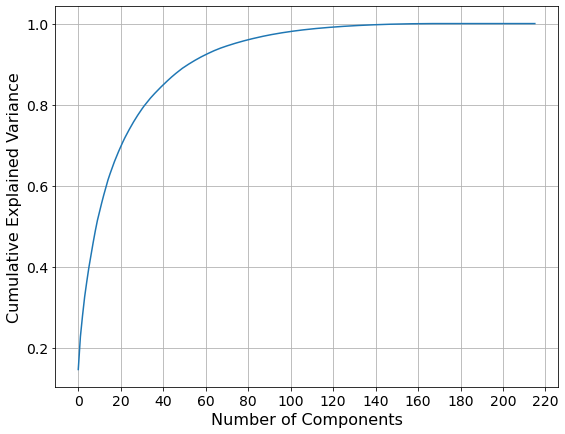

In [48]:
plt.figure(figsize=(9,7))
pca = PCA()
pX_train = pca.fit_transform(X_train)
pX_test = pca.fit_transform(X_test)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Cumulative Explained Variance', fontsize = 16)
plt.xticks(np.arange(0,240,20), fontsize=14)
plt.yticks(fontsize = 14)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [49]:
pca = PCA(n_components=40)
pX_train = pca.fit_transform(X_train)

lreg = LinearRegression()
lreg.fit(pX_train,Y_train)

pca_Y_pred = lreg.predict(pX_train)

train_rscore_pca = r2_score(pca_Y_pred,Y_train)
train_rmse_pca = np.sqrt(mean_squared_error(pca_Y_pred,Y_train))

print("Train Root Mean Square Error:", train_rmse_pca)
print("Train R-Square:",np.round(train_rscore_pca,2))

Train Root Mean Square Error: 27049.854136393722
Train R-Square: 0.81


Test Root Mean Square Error: 65566.37196409205
Test R-square: 0.01


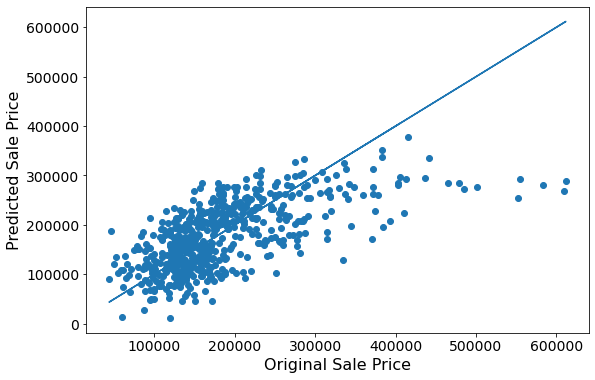

In [57]:
pX_test = pca.fit_transform(X_test)

pca_Ytest_pred = lreg.predict(pX_test)
test_rscore_pca = r2_score(pca_Ytest_pred,Y_test)
test_rmse_pca = np.sqrt(mean_squared_error(pca_Ytest_pred,Y_test))

print("Test Root Mean Square Error:", test_rmse_pca)
print("Test R-square:",np.round(test_rscore_pca,2))
plt.figure(figsize=(9,6))
plt.plot(Y_test,Y_test)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.scatter(Y_test,pca_Ytest_pred)
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price", fontsize =16)

plt.show()

Cross Validation

In [58]:
pca = PCA(n_components=40)
XX = pca.fit_transform(sc.fit_transform(X))

pca_scores = cross_validate(lreg, XX, Y, cv=10, scoring=['r2','neg_mean_squared_error'])

print("Average Root Mean Square Error: ",np.sqrt(abs(pca_scores['test_neg_mean_squared_error'].mean())))
print("Average R-Squared",np.around(pca_scores['test_r2'].mean(),2))


Average Root Mean Square Error:  32805.558547851484
Average R-Squared 0.8


Support Vector Regression

In [59]:
param = {'C':[0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','poly']}
SVRModel = GridSearchCV(SVR(), param, refit = True, verbose =3) #hyper parameter tuning
SVRModel.fit(X_train,Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.075, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.022, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.047, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.046, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.099, total=   1.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-0.071, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-0.019, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-0.043, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-0.042, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 14.3min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [60]:
SVRModel.best_estimator_

SVR(C=10, gamma=1, kernel='poly')

In [61]:
modelsvr = SVRModel.best_estimator_

In [62]:
#import math
modelsvr.fit(X_train,Y_train)
y_trainsvr_pred = modelsvr.predict(X_train)
train_rmse_svr = np.sqrt(mean_squared_error(y_trainsvr_pred, Y_train))
train_rscore_svr = r2_score(y_trainsvr_pred,Y_train)
print("Train Root Mean Square Error:", train_rmse_svr)
print("Train R-square:",np.round(train_rscore_svr,2))


Train Root Mean Square Error: 9524.263457890862
Train R-square: 0.98


Root Mean Square Error: 21468.775320006345
R square: 0.93


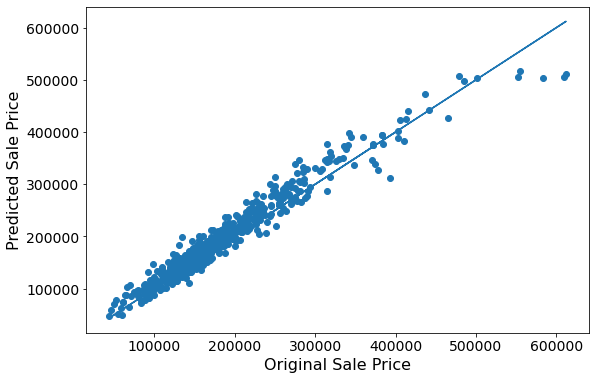

In [64]:
plt.figure(figsize=(9,6))
plt.plot(Y_test,Y_test)
y_testsvr_pred = modelsvr.predict(X_test)
test_rmse_svr = np.sqrt(mean_squared_error(y_testsvr_pred, Y_test))
test_rscore_svr = r2_score(y_testsvr_pred,Y_test)
print("Root Mean Square Error:", test_rmse_svr)
print("R square:",np.round(test_rscore_svr,2))
plt.scatter(Y_test,y_testsvr_pred)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price", fontsize =16)

plt.show()

Cross Validation

In [65]:
XX = sc.fit_transform(X)
pca_scores_svr = cross_validate(modelsvr, XX, Y, cv=10, scoring=['r2','neg_mean_squared_error'])

print("Average Root Mean Square Error: ",np.sqrt(abs(pca_scores_svr['test_neg_mean_squared_error'].mean())))
print("Average R-Squared",np.around(pca_scores_svr['test_r2'].mean(),2))


Average Root Mean Square Error:  20016.679476993162
Average R-Squared 0.92


Regression Tree

In [74]:
depths = np.arange(1, 10)
param = [{'max_depth':depths, 'min_samples_leaf':[1,5,10,15,20,25,30], 'criterion':['mse', 'friedman_mse', 'mae'],'min_samples_split':[2,3,4],'splitter':['best','random']}]
dtrgrid = GridSearchCV(DecisionTreeRegressor(), param_grid=param, scoring='r2')
dtrgrid.fit(X_train,Y_train)
dtrgrid.best_score_
dtrgrid.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=15)

Training results

In [76]:
modelrt = dtrgrid.best_estimator_
modelrt.fit(X_train,Y_train)
y_trainrt_pred = modelrt.predict(X_train)
train_rscore_rt = r2_score(y_trainrt_pred,Y_train)
train_rmse_rt = mean_squared_error(y_trainrt_pred,Y_train)
print('Train Root Mean Squared Error:', np.round(np.sqrt(train_rmse_rt)))
print('Train R-Squared:', np.round(train_rscore_rt,2))

Train Root Mean Squared Error: 21800.0
Train R-Squared: 0.89


Root Mean Squared Error: 37867.8287997819
R Squared: 0.76


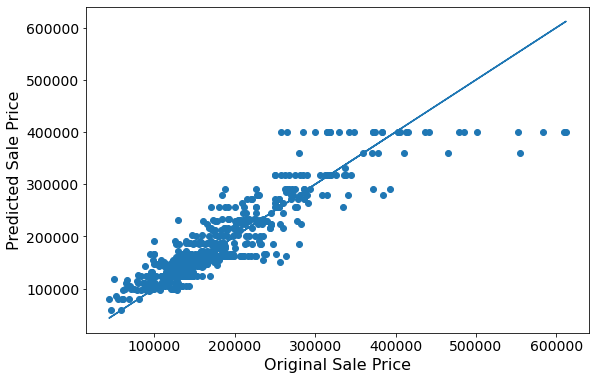

In [77]:
plt.figure(figsize=(9,6))
plt.plot(Y_test,Y_test)

y_testrt_pred = modelrt.predict(X_test)
test_rscore_rt = r2_score(y_testrt_pred,Y_test)
test_rmse_rt = mean_squared_error(y_testrt_pred,Y_test)
print('Root Mean Squared Error:', np.sqrt(test_rmse_rt))
print('R Squared:', np.round(test_rscore_rt,2))
plt.scatter(Y_test,y_testrt_pred)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.xlabel("Original Sale Price",fontsize =16)
plt.ylabel("Predicted Sale Price",fontsize =16)
plt.show()

Cross Validation

In [79]:
XX = sc.fit_transform(X)
pca_scores_rt = cross_validate(modelrt, XX, Y, cv=10, scoring=['r2','neg_mean_squared_error'])

print("Average Root Mean Square Error: ",np.sqrt(abs(pca_scores_rt['test_neg_mean_squared_error'].mean())))
print("Average R-Squared",np.around(pca_scores_rt['test_r2'].mean(),2))

Average Root Mean Square Error:  31676.283590032624
Average R-Squared 0.81


# Resampling

In [82]:
from sklearn.utils import shuffle
df_grand = pd.concat([df_housing2,df_housing2,df_housing2,df_housing2])
df_grand = shuffle(df_grand)

In [83]:
Y_re = df_grand['SalePrice'].values
df_grand.drop(['SalePrice'], axis=1, inplace=True)
X_re = df_grand.values

X_retrain, X_retest, Y_retrain, Y_retest = train_test_split(X_re, Y_re, test_size=0.2, random_state = 42)

In [84]:
iso_train = IsolationForest(contamination=0.1)
yhat_ = iso_train.fit_predict(X_retrain)
ind_ = yhat_ != -1
X_retrain, Y_retrain = X_retrain[ind_, :], Y_retrain[ind_]

Deep Neural Network Resampled

In [85]:
modelresamp = Sequential()
modelresamp.add(Dense(output_dim = 216, kernel_initializer ='he_uniform', activation = 'relu', input_dim = 216)) 
modelresamp.add(Dropout(0.1))
modelresamp.add(Dense(output_dim = 100, kernel_initializer ='he_uniform', activation = 'relu')) 
modelresamp.add(Dropout(0.1))
modelresamp.add(Dense(output_dim = 1))
modelresamp.compile(loss= root_mean_squared_error, optimizer = 'adamax', metrics=[r_squared])
modelresamp_history = modelresamp.fit(X_retrain,Y_retrain,validation_split=0.20, batch_size = 20,  epochs = 500)

C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", input_dim=216, units=216)`
  
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="he_uniform", activation="relu", units=100)`
  after removing the cwd from sys.path.
C:\Users\oyind\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


Train on 6740 samples, validate on 1686 samples
Epoch 1/500
6740/6740 [==============================] - 1s 127us/step - loss: 73331.1092 - r_squared: -0.7367 - val_loss: 46452.1675 - val_r_squared: 0.4546
Epoch 2/500
6740/6740 [==============================] - 1s 105us/step - loss: 44199.2584 - r_squared: 0.5054 - val_loss: 36131.3253 - val_r_squared: 0.6614
Epoch 3/500
6740/6740 [==============================] - 1s 99us/step - loss: 36823.4752 - r_squared: 0.6589 - val_loss: 33000.4753 - val_r_squared: 0.7183
Epoch 4/500
6740/6740 [==============================] - 1s 94us/step - loss: 35160.4961 - r_squared: 0.6860 - val_loss: 32052.1093 - val_r_squared: 0.7216
Epoch 5/500
6740/6740 [==============================] - 1s 100us/step - loss: 34095.7406 - r_squared: 0.6983 - val_loss: 31423.4647 - val_r_squared: 0.7371
Epoch 6/500
6740/6740 [==============================] - 1s 94us/step - loss: 33892.7072 - r_squared: 0.6996 - val_loss: 31255.5192 - val_r_squared: 0.7412
Epoch 7/500


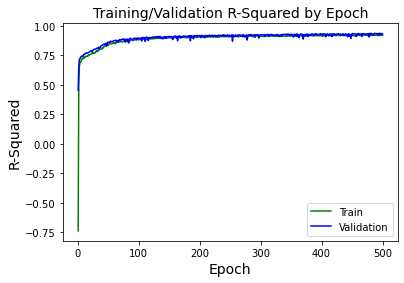

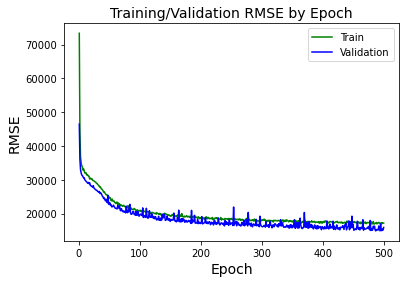

In [86]:
f, ax = plt.subplots()
ax.plot([None] + modelresamp_history.history['r_squared'], 'g')
ax.plot([None] + modelresamp_history.history['val_r_squared'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation R-Squared by Epoch',fontsize=14) 
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('R-Squared', fontsize=14)

f, ax = plt.subplots()
ax.plot([None] + modelresamp_history.history['loss'], 'g')
ax.plot([None] + modelresamp_history.history['val_loss'], 'b')
ax.legend(['Train', 'Validation'], loc = 0)
ax.set_title('Training/Validation RMSE by Epoch',fontsize=14)
ax.set_xlabel('Epoch',fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
plt.show()

2340/2340 [==============================] - 0s 26us/step
Root Mean Square Error: 18057.0
R square: 0.94


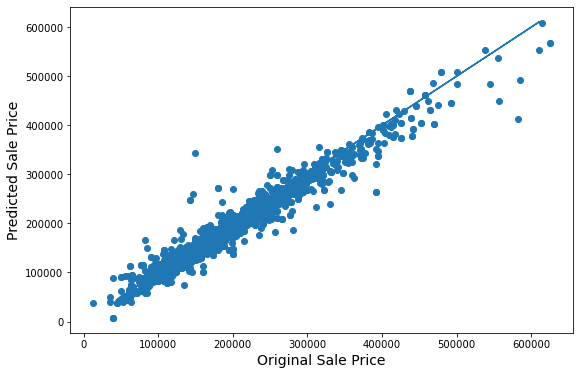

In [87]:
plt.figure(figsize=(9,6))
y_repred = modelresamp.predict(X_retest)
mse_nn, rscore_nn = modelresamp.evaluate(X_retest,Y_retest)

plt.plot(Y_test,Y_test)
print("Root Mean Square Error:", np.round(mse_nn))
print("R square:",np.round(rscore_nn,2))
plt.scatter(Y_retest,y_repred)
plt.xlabel("Original Sale Price",fontsize =14)
plt.ylabel("Predicted Sale Price", fontsize =14)

plt.show()

SVR Resampled

In [88]:
model_resvr = SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01, kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Root Mean Square Error: 36678.39879482101
R square: 0.66


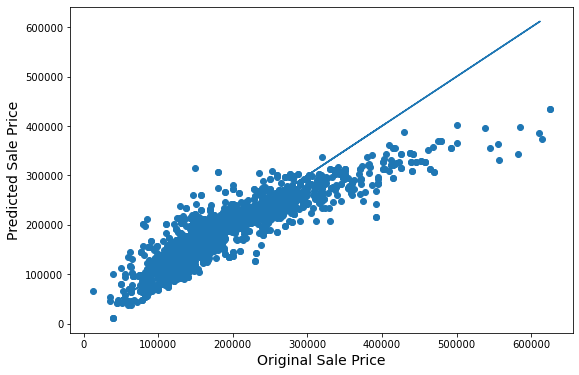

In [89]:
plt.figure(figsize=(9,6))

plt.plot(Y_test,Y_test)

model_resvr.fit(X_retrain,Y_retrain)
y_repred = model_resvr.predict(X_retest)
mse_svr = np.sqrt(mean_squared_error(y_repred, Y_retest))
rscore_svr = r2_score(y_repred,Y_retest)
print("Root Mean Square Error:", mse_svr)
print("R square:",np.round(rscore_svr,2))
plt.scatter(Y_retest,y_repred)
plt.xlabel("Original Sale Price",fontsize =14)
plt.ylabel("Predicted Sale Price", fontsize =14)

plt.show()

References

- Manish Pathak (2020). Handling Categorical Data in Python. Retrieved from https://www.datacamp.com/community/tutorials/categorical-data
- One-Hot Encoding a Feature on a Pandas Dataframe: Examples. Retrieved from https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

- Implement a Custom Metric Function in Keras. Retrieved from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/

- Jason Brownlee (2020). Automatic Outlier Detection Algorithms in Python. Retrieved from https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

- Chris (2020). How to use K-fold Cross Validation with Keras? Retrieved from https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/